In [ ]:
import os
import sys
sys.path.append("..")
from scipy import stats
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams["figure.dpi"]=300

import pickle
import seaborn as sns
sns.set(font_scale=0.8)
from sklearn.metrics import r2_score
from scipy.stats import pearsonr,spearmanr
from src.utils import create_total_df,create_total_df_sv

In [2]:
seq_df = pd.read_csv('/home/ksuga/whole_mrna_predictor/UTR_PairPred/data/human/gencode44_utr_gene_unique_cdhit09.csv')
remover= lambda x:x.split(".")[0]
#seq_df["ENST_ID_PRE"] = seq_df["ENST_ID"].apply(remover)

res_dir="/home/ksuga/whole_mrna_predictor/UTR_PairPred/results/runs/contrastive_learning_10fold_shuffle_seed0"
res_dir1 = "/home/ksuga/whole_mrna_predictor/UTR_PairPred/results/runs/contrastive_learning_10fold_shuffle_seed1"
res_dir_mlp = '/home/ksuga/whole_mrna_predictor/UTR_PairPred/results/runs/MLP_split_large_ave_10fold'
res_dir_mlp1 = '/home/ksuga/whole_mrna_predictor/UTR_PairPred/results/runs/MLP_split_large_ave_10fold_seed1'

rinalmo1 = "/home/ksuga/whole_mrna_predictor/UTR_PairPred/results/runs/contrastive_learning_10fold_rinalmo_whole_ave_seed1"
rinalmo2 = "/home/ksuga/whole_mrna_predictor/UTR_PairPred/results/runs/contrastive_learning_10fold_rinalmo_whole_ave_seed2"

## 1.check difference of each exp

### 1.1 Contrastive learning

In [3]:
tot_df0 = create_total_df(rinalmo1,seq_df)
tot_df1 = create_total_df(rinalmo2,seq_df)

In [5]:
tot_df0

,utr5,utr3,label,pred,correct,logits,cos_sim,ENST_ID,ENST_ID_PRE,GENE,5UTR,CDS,3UTR,total_len,5UTR_len,CDS_len,3UTR_len
293,9257,9257,1,True,True,0.705522,0.873735,ENST00000528841.6,ENST00000528841,BRSK2,GGCUCGGCUCGGCUGCGCGGCCGCUGACGGGCGUGCGCUGGGGGCG...,AUGACAUCGACGGGGAAGGACGGCGGCGCGCAGCACGCGCAGUAUG...,ACACACUAGCCCCCCCCCCCAGCACAGCACUGACAGCGGCUGCCUC...,4528,351,2211,1966
296,3716,3716,1,True,True,0.696336,0.829912,ENST00000618052.2,ENST00000618052,H3C7,AGUUGUGACCAUUGCUUGAAACCCAUUCCU,AUGGCACGCACGAAGCAAACAGCUCGUAAGUCCACUGGCGGCAAAG...,GUUGUACUGAGGGUGUGCGCCAACUUAAACCAAAGGCUCUUUUCAG...,494,30,411,53
299,3520,3520,1,True,True,0.695916,0.827926,ENST00000328345.8,ENST00000328345,POU3F2,AGAGAGCUGGAGAGAGCAGGGAGAGGGGGGAGCGCCGAGCUAGUCA...,AUGGCGACCGCAGCGUCUAACCACUACAGCCUGCUCACCUCCAGCG...,ACUCGAGCUGGGGGAGGGGCAGAGCGCGGGGCUCCCCCUCCCCUUC...,4885,300,1332,3253
405,1384,1384,1,True,True,0.694372,0.820638,ENST00000293441.6,ENST00000293441,SHANK1,AGAGACAGCGAGAGCGAGAGAGCGAGAAGGGUGGCAGAGGAGGCGC...,AUGACCCACAGCCCCGCGACAAGCGAGGACGAGGAACGCCACAGUG...,UGGCUGGCCUGGACGGACCAGCCCCGUCCACAGAACUCUUGAGCCU...,9636,440,6486,2710
28,7625,7625,1,True,True,0.694133,0.819514,ENST00000394166.8,ENST00000394166,NR2F2,GAGAAGCCACUUCUGCCAGCCCCGGCGCCUAUAAAUCGCAUUCCCU...,AUGGCAAUGGUAGUCAGCACGUGGCGCGACCCCCAGGACGAGGUGC...,AUAAAUAAAAUAAGAAGGGGGAGUGAAACAGAGAAAGAAAAGGCAA...,5287,1406,1245,2636
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,3689,3689,1,False,False,0.396502,-0.420062,ENST00000567435.5,ENST00000567435,UBL7,GGCGCUGGGGCCCUGGGCAGCGCGGGCUCGAUGUGUGUCAGCCAAG...,AUGUCUCUCUCAGACUGGCACCUGGCGGUGAAGCUGGCUGACCAGC...,ACUCCCUGCUUCCCCUGAACCCCCAGCAAGUUGCAGAGGCUACUGC...,1720,464,1143,113
784,6853,6853,1,False,False,0.395291,-0.425126,ENST00000306324.4,ENST00000306324,HOXD4,AGUUGACAGCAAGUAGGAGGGCCCUAUGGAAGGAGAAAAAAAGACA...,AUGGUCAUGAGUUCGUAUAUGGUGAACUCCAAGUAUGUGGACCCCA...,AAGUGGGGACCCUGGGCCCAUCUCUCCCUGCGCACCAGGCUGAGCC...,1136,84,768,284
1622,7255,7255,1,False,False,0.394273,-0.429387,ENST00000337014.10,ENST00000337014,HEXD,GUCGGGCCAGGCCCCGCCCCAUCAGCCCCAGUCCCGCCCACUCCAU...,AUGUCAGGUUCCACUCCAUUUCAGAUGAGAUUAGUUCAUUUAGACC...,UCUGCAUGUGUGACACUGAUUCUUUGGAAAUAAAGAGUGGAAGCUG...,2285,474,1758,53
458,9617,9617,1,False,False,0.392457,-0.436998,ENST00000334134.4,ENST00000334134,FGF3,AGAGCCAGGAGGGCUUUCGGGGGCGUGGGGCGCGCUGCGGAGCGGA...,AUGGGCCUAAUCUGGCUGCUACUGCUCAGCCUGCUGGAGCCCGGCU...,CUGGGCCUGGUGGCCACCGCCAGAGCUCCUGGCGACAUCUUGGCGU...,1540,483,720,337


In [38]:
tot_df0[(tot_df0['cos_sim']>0.7)]['GENE'].to_csv('./results/analysis/human_CL_rinalmo_cossim07.csv',index=False)

In [ ]:
with open('./data/human/CL_CosSim_go32502_5utr.fa',"w") as f5, open('./data/human/CL_CosSim_go32502_3utr.fa',"w") as f3 : 
    for enst_id,utr5,utr3 in seq_df.set_index('ENST_ID_PRE').loc[match_enst][['ENST_ID','5UTR','3UTR']].values:
        sequence_id = f">{enst_id}"
        f5.write(f"{sequence_id}\n{utr5}\n")
        f3.write(f"{sequence_id}\n{utr3}\n")

In [10]:
## for metascape
top_genes=tot_df1[(tot_df1["correct"]==True)&(tot_df1["cos_sim"]>0.8)]["GENE"].values
meta_scape=pd.DataFrame({"Gene":top_genes,"OptionalDataColumns":np.arange(len(top_genes))})
meta_scape.to_csv(f"./results/analysis/human_CL_10fold_cossim08_genes_seed1.csv",index=False)
meta_scape

,Gene,OptionalDataColumns
0,NR2F2,0
1,TNRC6C,1
2,KRTAP1-3,2
3,MAF,3
4,ELFN1,4
...,...,...
91,DSPP,91
92,DLGAP3,92
93,UGT2A1,93
94,KRTAP20-1,94


In [5]:
concat = pd.merge(tot_df0.iloc[:,4:9],tot_df1.iloc[:,4:9],on="ENST_ID",how="inner")
concat.shape

(16819, 9)

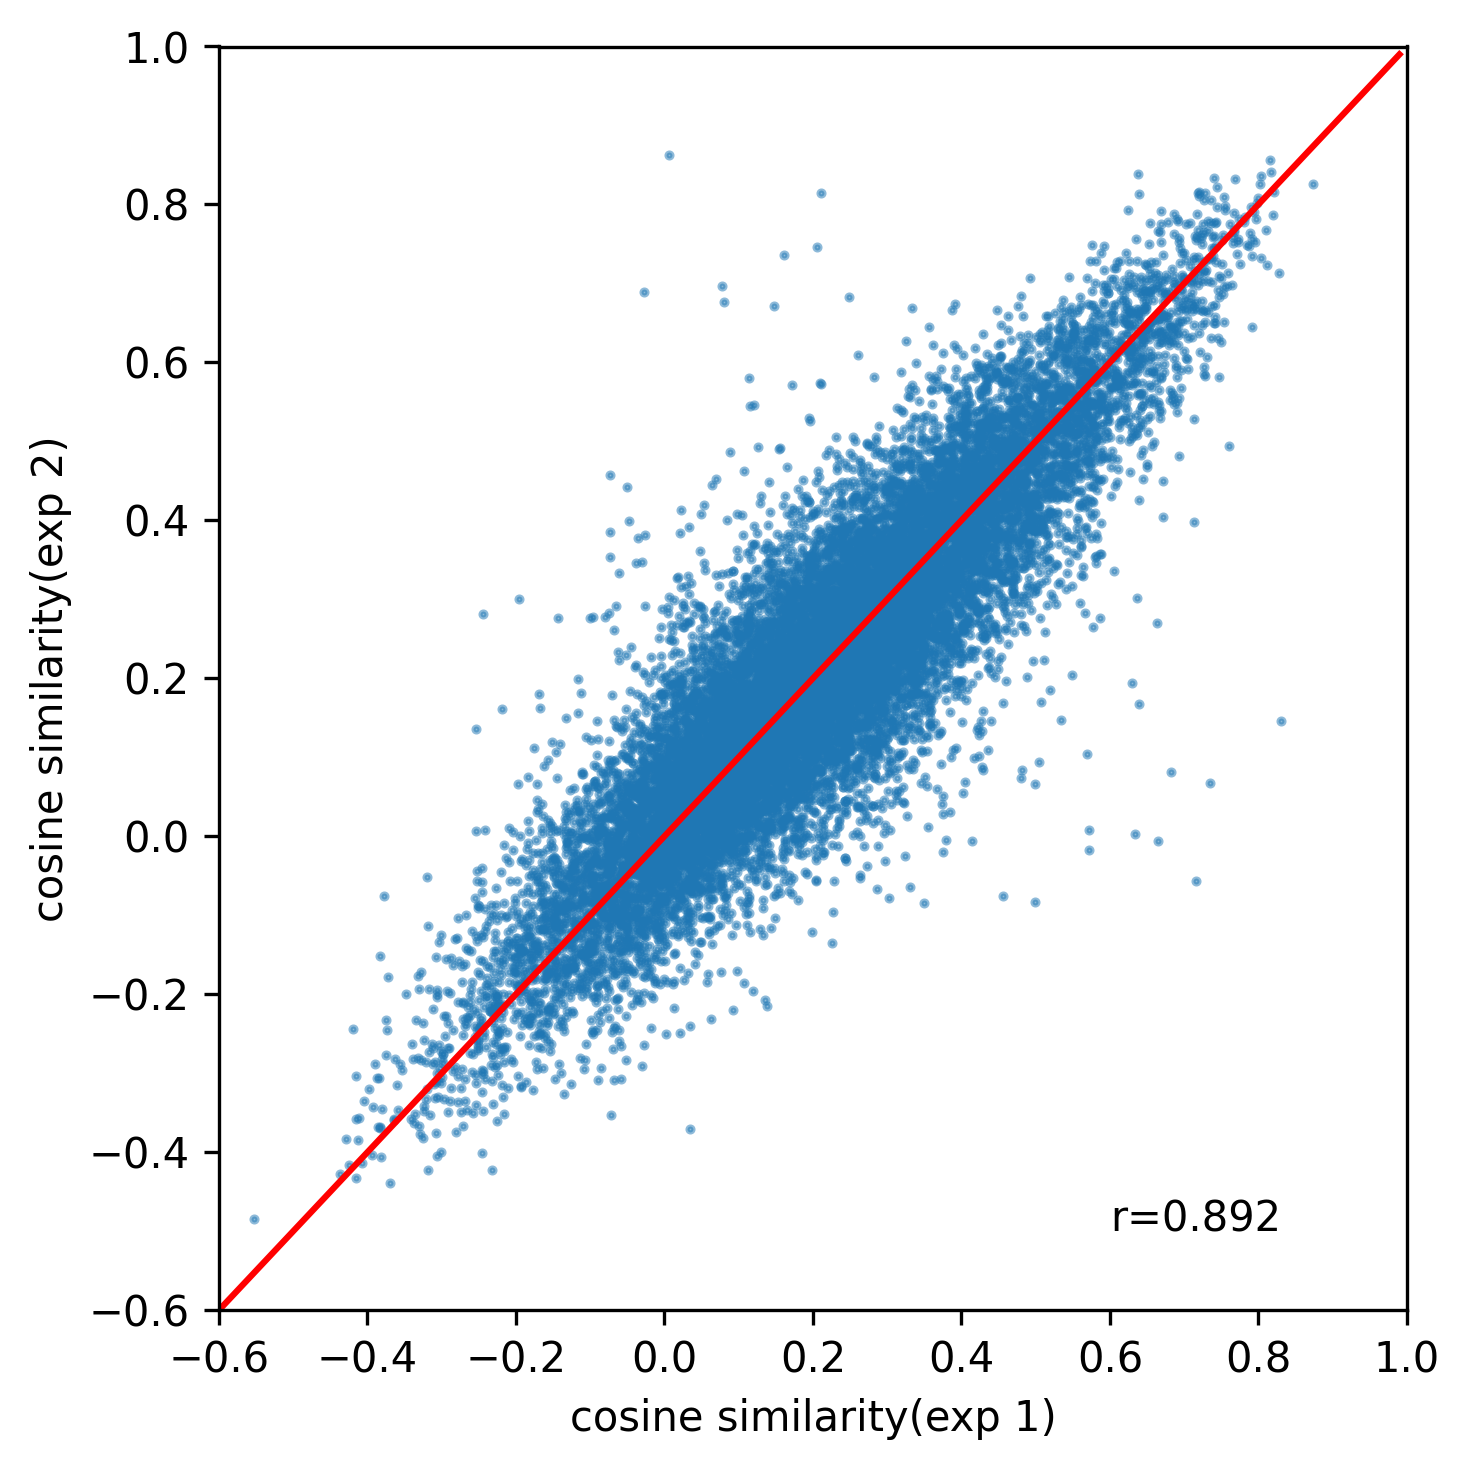

In [ ]:
fig = plt.figure(figsize=(5,5))
x = concat["cos_sim_x"]
y = concat["cos_sim_y"]
label_name = "cosine similarity"
line = np.arange(-0.6,1,0.01)
pear,_ = pearsonr(x,y)
r2 = r2_score(x,y)
#plt.title("exp diff (Contrastive learning)")
plt.scatter(x,y,alpha=0.5,s=2)
plt.plot(line,line,c='r')
plt.text(0.6,-0.5,f"r={pear:.3f}")
plt.xlim(-0.6,1)
plt.ylim(-0.6,1)
plt.xlabel(f'{label_name}(exp 1)')
plt.ylabel(f'{label_name}(exp 2)')
plt.tight_layout()
plt.savefig("../results/imgs/exp_diff_CL_rinalmo_paper")

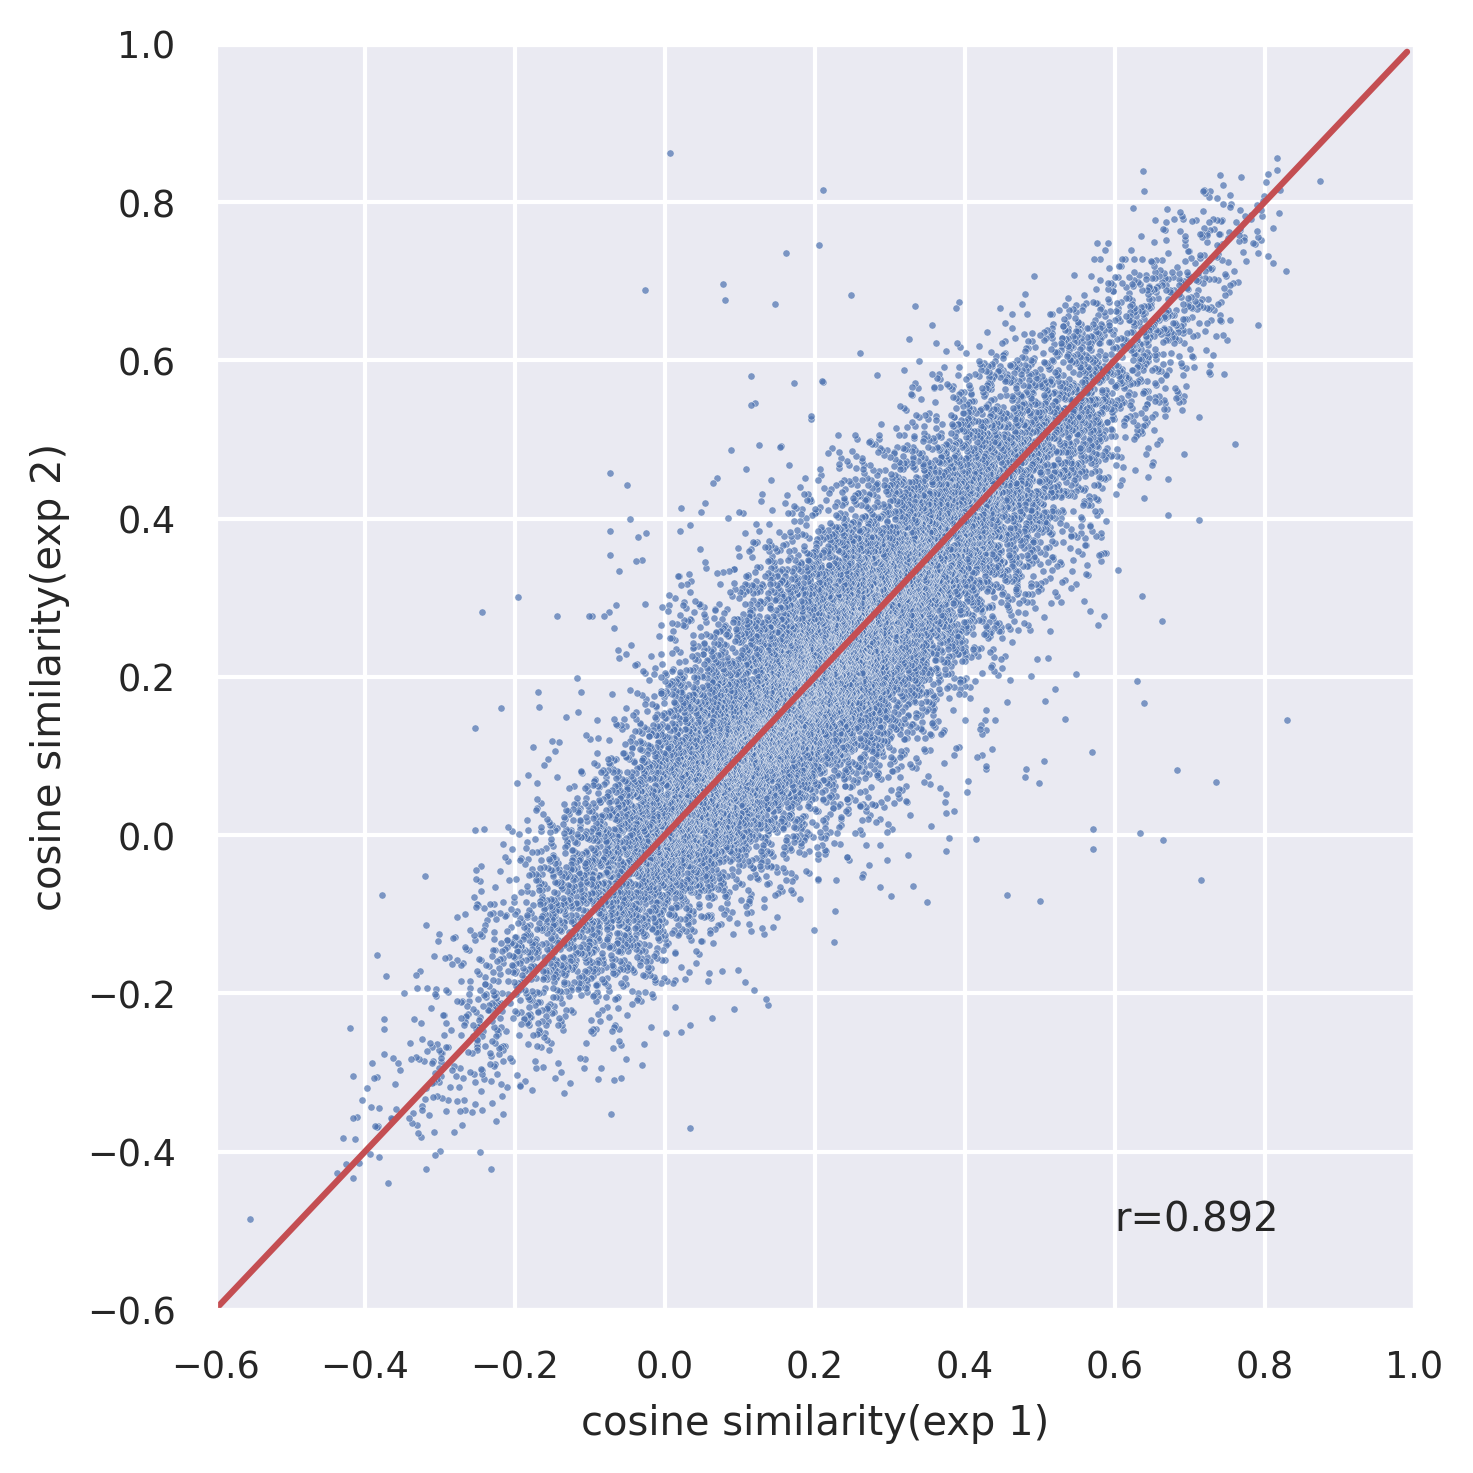

In [9]:
fig, ax = plt.subplots(figsize=(5, 5))
x = concat["cos_sim_x"]
y = concat["cos_sim_y"]
label_name = "cosine similarity"
line = np.arange(-0.6, 1, 0.01)
pear, _ = pearsonr(x, y)
r2 = r2_score(x, y)

sns.scatterplot(x=x, y=y, alpha=0.7, s=3, ax=ax)
sns.lineplot(x=line, y=line, color="r", ax=ax)
ax.text(0.6, -0.5, f"r={pear:.3f}")
ax.set_xlim(-0.6, 1)
ax.set_ylim(-0.6, 1)
ax.set_xlabel(f"{label_name}(exp 1)")
ax.set_ylabel(f"{label_name}(exp 2)")
plt.tight_layout()
plt.savefig("../results/imgs/exp_diff_CL_rinalmo_seaborn_paper")

### 1.2 MLP (supervised)

In [19]:
tot_df0 = create_total_df_sv(res_dir_mlp,seq_df)
tot_df1 = create_total_df_sv(res_dir_mlp1,seq_df)

In [20]:
concat = pd.merge(tot_df0.iloc[:,4:9],tot_df1.iloc[:,4:9],on="ENST_ID",how="inner")
concat.shape

(16819, 9)

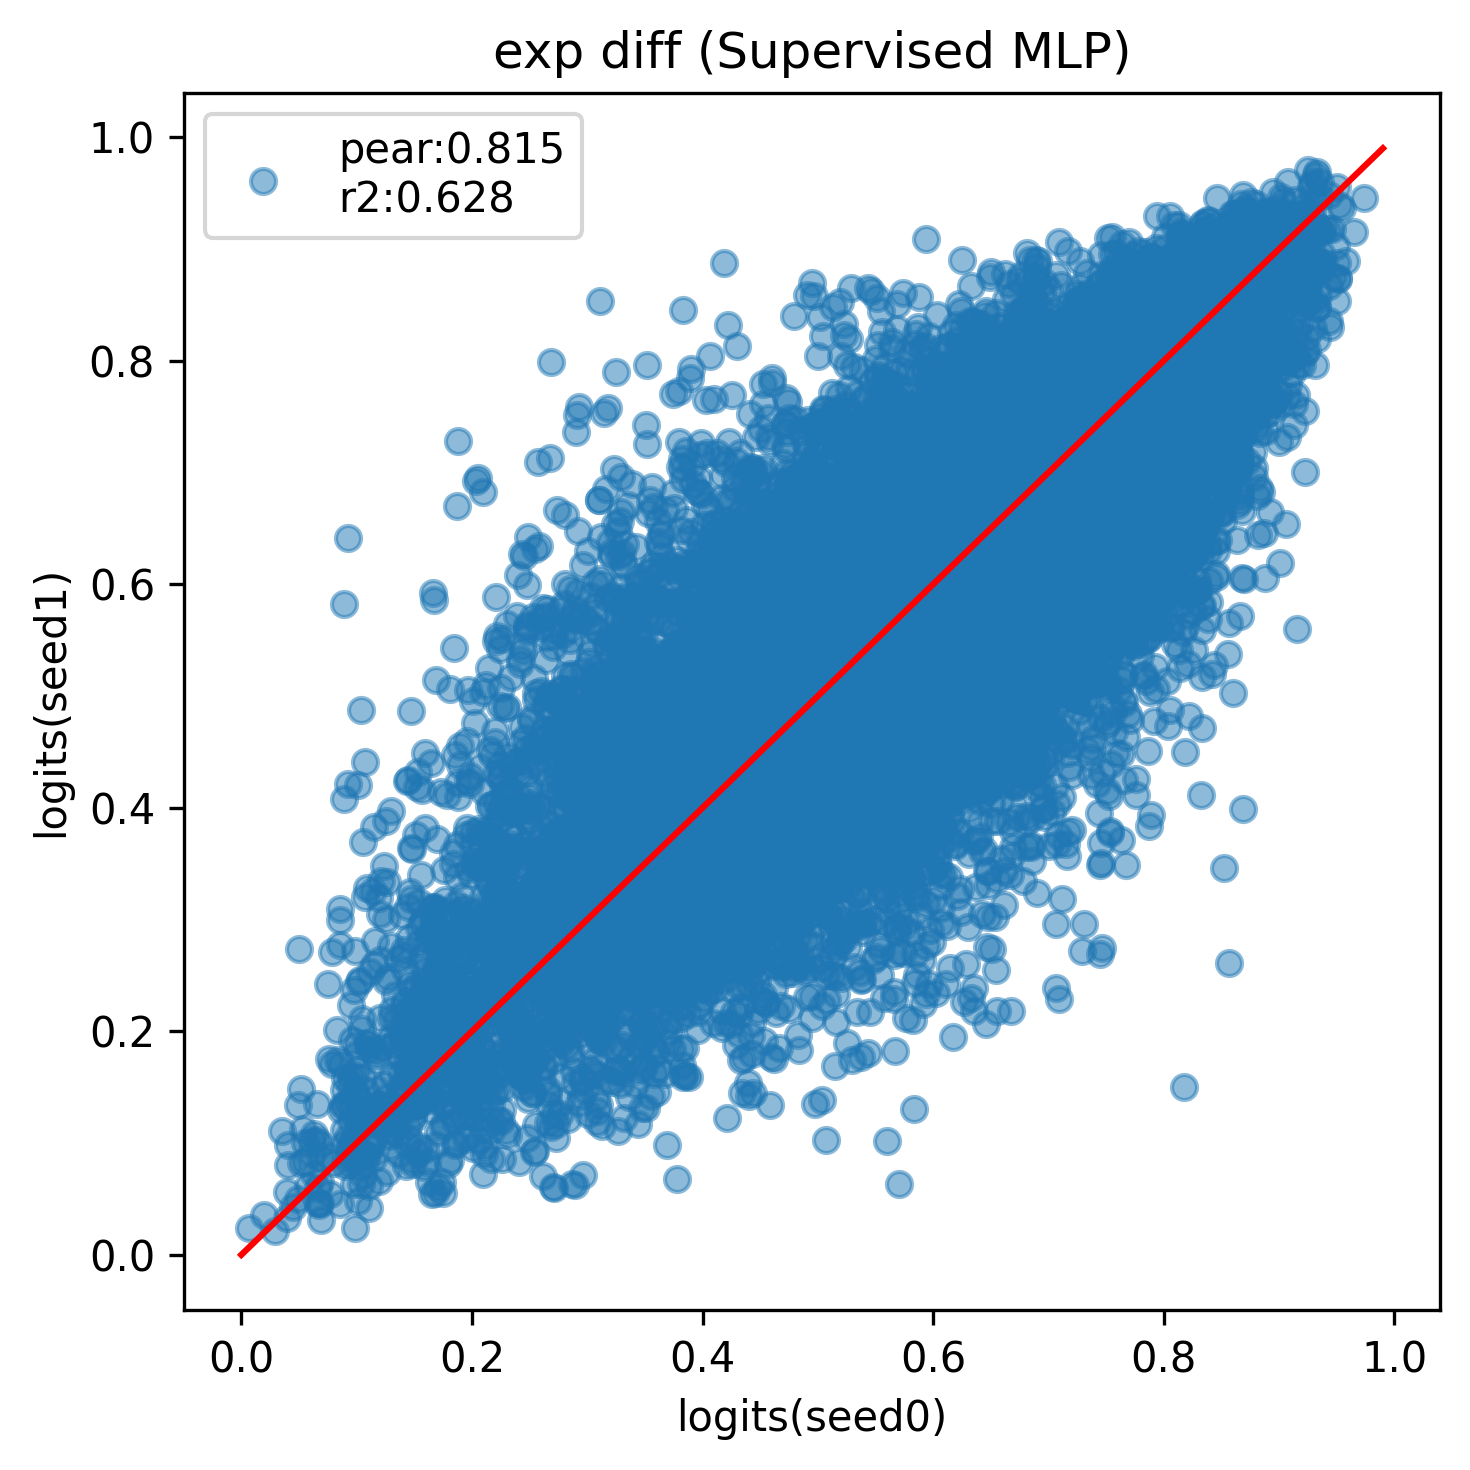

In [22]:
fig = plt.figure(figsize=(5,5))
x = concat["logits_x"]
y = concat["logits_y"]
label_name = "logits"
line = np.arange(0,1,0.01)
pear,_ = pearsonr(x,y)
r2 = r2_score(x,y)
plt.title("exp diff (Supervised MLP)")
plt.scatter(x,y,alpha=0.5,label=f'pear:{pear:.3f}\nr2:{r2:.3f}')
plt.plot(line,line,c='r')
plt.legend()
plt.xlabel(f'{label_name}(seed0)')
plt.ylabel(f'{label_name}(seed1)')
plt.tight_layout()
plt.savefig("./results/imgs/exp_diff_MLP")

## 2. Analyse stats

In [29]:
df = pd.read_csv('/home/ksuga/whole_mrna_predictor/UTR_PairPred/results/runs/contrastive_learning_10fold_rinalmo_ave_seed0/score_of_score_dic.csv',index_col=0).T
df.describe()

,accuracy,precision,recall,f1,matthews,auc_roc,auc_prc
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,0.591250,0.562724,0.823652,0.668592,0.205572,0.633290,0.604760
std,0.009111,0.006849,0.009878,0.005916,0.018986,0.008207,0.009121
min,0.578571,0.552280,0.809750,0.659928,0.179638,0.619776,0.591713
25%,0.586161,0.558491,0.816885,0.665217,0.195593,0.627372,0.597908
50%,0.590179,0.562508,0.821344,0.666905,0.201711,0.633707,0.605785
75%,0.596949,0.567598,0.829195,0.670198,0.215693,0.637350,0.609991
max,0.603869,0.572016,0.841855,0.680279,0.235684,0.647514,0.622217


In [18]:
cl_dir = "/home/ksuga/whole_mrna_predictor/UTR_PairPred/results/runs/contrastive_learning_10fold_shuffle_seed0"
cl_rinalmo_dir = "/home/ksuga/whole_mrna_predictor/UTR_PairPred/results/runs/contrastive_learning_10fold_rinalmo_whole_ave_seed0"
mlp_dir = "/home/ksuga/whole_mrna_predictor/UTR_PairPred/results/runs/MLP_split_large_ave_10fold_shuffle_seed0"
mlp_rinalmo_dir = "/home/ksuga/whole_mrna_predictor/UTR_PairPred/results/runs/MLP_split_large_rinalmo_whole_ave_10fold_seed0"

dir_list = {"cl":cl_dir,"cl_rinalmo":cl_rinalmo_dir,"mlp":mlp_dir,"mlp_rinalmo":mlp_rinalmo_dir}

In [24]:
## mouse
cl_dir = "/home/ksuga/whole_mrna_predictor/UTR_PairPred/results/runs/mouse_contrastive_learning_10fold_shuffle_seed0"
cl_rinalmo_dir = "/home/ksuga/whole_mrna_predictor/UTR_PairPred/results/runs/mouse_contrastive_learning_rinalmo_whole_ave_10fold_seed0"
mlp_dir = "/home/ksuga/whole_mrna_predictor/UTR_PairPred/results/runs/mouse_MLP_split_large_ave_10fold_shuffle_seed1"
mlp_rinalmo_dir = "/home/ksuga/whole_mrna_predictor/UTR_PairPred/results/runs/mouse_MLP_split_large_rinalmo_whole_ave_10fold_shuffle_seed0"

dir_list = {"cl":cl_dir,"cl_rinalmo":cl_rinalmo_dir,"mlp":mlp_dir,"mlp_rinalmo":mlp_rinalmo_dir}

In [25]:
for name,dir_path in dir_list.items():
    tmp_df = pd.read_csv(os.path.join(dir_path,"score_of_score_dic.csv"),index_col=0).T
    print(f"{name}:{tmp_df.describe().loc['mean']}")

cl:accuracy     0.646350
precision    0.602997
recall       0.867068
f1           0.711276
matthews     0.324551
auc_roc      0.724044
auc_prc      0.708580
Name: mean, dtype: float64
cl_rinalmo:accuracy     0.658020
precision    0.611715
recall       0.874663
f1           0.719888
matthews     0.349092
auc_roc      0.741272
auc_prc      0.727902
Name: mean, dtype: float64
mlp:accuracy     0.652461
precision    0.633398
recall       0.732704
f1           0.679297
matthews     0.308413
auc_roc      0.713671
auc_prc      0.697733
Name: mean, dtype: float64
mlp_rinalmo:accuracy     0.667091
precision    0.644373
recall       0.752960
f1           0.694409
matthews     0.338585
auc_roc      0.735967
auc_prc      0.719495
Name: mean, dtype: float64


In [10]:
cl_df = pd.read_csv(os.path.join(cl_dir,"score_of_score_dic.csv"),index_col=0).T
mlp_df = pd.read_csv(os.path.join(mlp_dir,'score_of_score_dic.csv'),index_col=0).T

## 3.TE & feature analysis

In [6]:
cl_dir = "/home/ksuga/whole_mrna_predictor/UTR_PairPred/results/runs/contrastive_learning_10fold_shuffle_seed0"
cl_mouse_dir = "/home/ksuga/whole_mrna_predictor/UTR_PairPred/results/runs/mouse_contrastive_learning_10fold_shuffle_seed0"

tot_df_cl = create_total_df(cl_dir,seq_df)
tot_df_cl=tot_df_cl.drop("ENST_ID",axis=1).rename(columns={"ENST_ID_PRE":"ENST_ID"})

### 3.1 HEK293(iwasaki)

In [15]:
te_df = pd.read_csv("/home/ksuga/whole_mrna_predictor/UTR_PairPred/data/iwasaki_lab/Human_HEK293T/SIKT09/TE_HS_CT1.csv",index_col=0)
te_df['te_log'] = np.log(te_df['TE'])
te_df['ribo_log'] = np.log(te_df['TPM_ribo'])
te_df['rna_log'] = np.log(te_df['TPM_rna'])
df_concat_cl=pd.merge(te_df,tot_df_cl,on="ENST_ID",how="inner")
#df_concat_mlp = pd.merge(te_df,tot_df_mlp,on="ENST_ID",how="inner")

In [16]:
thresh = np.arange(0,1.1,0.2)
bin_dic = dict()
target_labels= ['TE','TPM_ribo','TPM_rna','te_log','ribo_log','rna_log']
for i in range(len(thresh)-1):
    upper_th = thresh[i+1]
    lower_th = thresh[i]
    tmp_df = df_concat_cl[(df_concat_cl['cos_sim']>lower_th)&(df_concat_cl['cos_sim']<upper_th)].describe()
    tmp_dic = tmp_df.loc['mean',target_labels]
    tmp_dic['count'] = tmp_df.loc['count'].values[0]
    bin_dic[f"{lower_th:.1f}-{upper_th:.1f}"] = tmp_dic
bin_dic['All'] = dict(df_concat_cl.describe().loc['mean',target_labels])
bin_df = pd.DataFrame(bin_dic).T
bin_df

,TE,TPM_ribo,TPM_rna,count,ribo_log,rna_log,te_log
0.0-0.2,2.165229,56.582370,52.693327,2775.0,2.006717,2.615229,-0.608512
0.2-0.4,1.681992,70.901127,56.609188,3407.0,1.970742,2.603952,-0.633210
0.4-0.6,1.948081,62.073263,49.518613,2062.0,1.850282,2.527838,-0.677556
0.6-0.8,1.581230,86.752576,43.484522,623.0,1.470937,2.219387,-0.748450
0.8-1.0,0.892039,9.350040,21.167631,58.0,1.417929,2.041295,-0.623366
All,1.877615,65.333481,52.315964,NaN,1.922001,2.552854,-0.630853


In [17]:
# for violin plot
thresh = np.arange(0,1.1,0.2)
labels = ["TE",'TPM_ribo','TPM_rna','te_log','ribo_log','rna_log']
tick_names =[]
violin_data_dic={label:[] for label in labels}
for i in range(len(thresh)-1):
    upper_th = thresh[i+1]
    lower_th = thresh[i]
    tmp_df = df_concat_cl[(df_concat_cl['cos_sim']>lower_th)&(df_concat_cl['cos_sim']<upper_th)]
    for l in labels:
        violin_data_dic[l].append(tmp_df[l].values)
    #tmp_dic['count'] = tmp_df.loc['count'].values[0]
    tick_names.append(f"{lower_th:.1f}-{upper_th:.1f}")
tick_names.append('All')

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

0.8-1.0 vs. All: Custom statistical test, P_val:1.134e-02
0.6-0.8 vs. All: Custom statistical test, P_val:2.518e-06


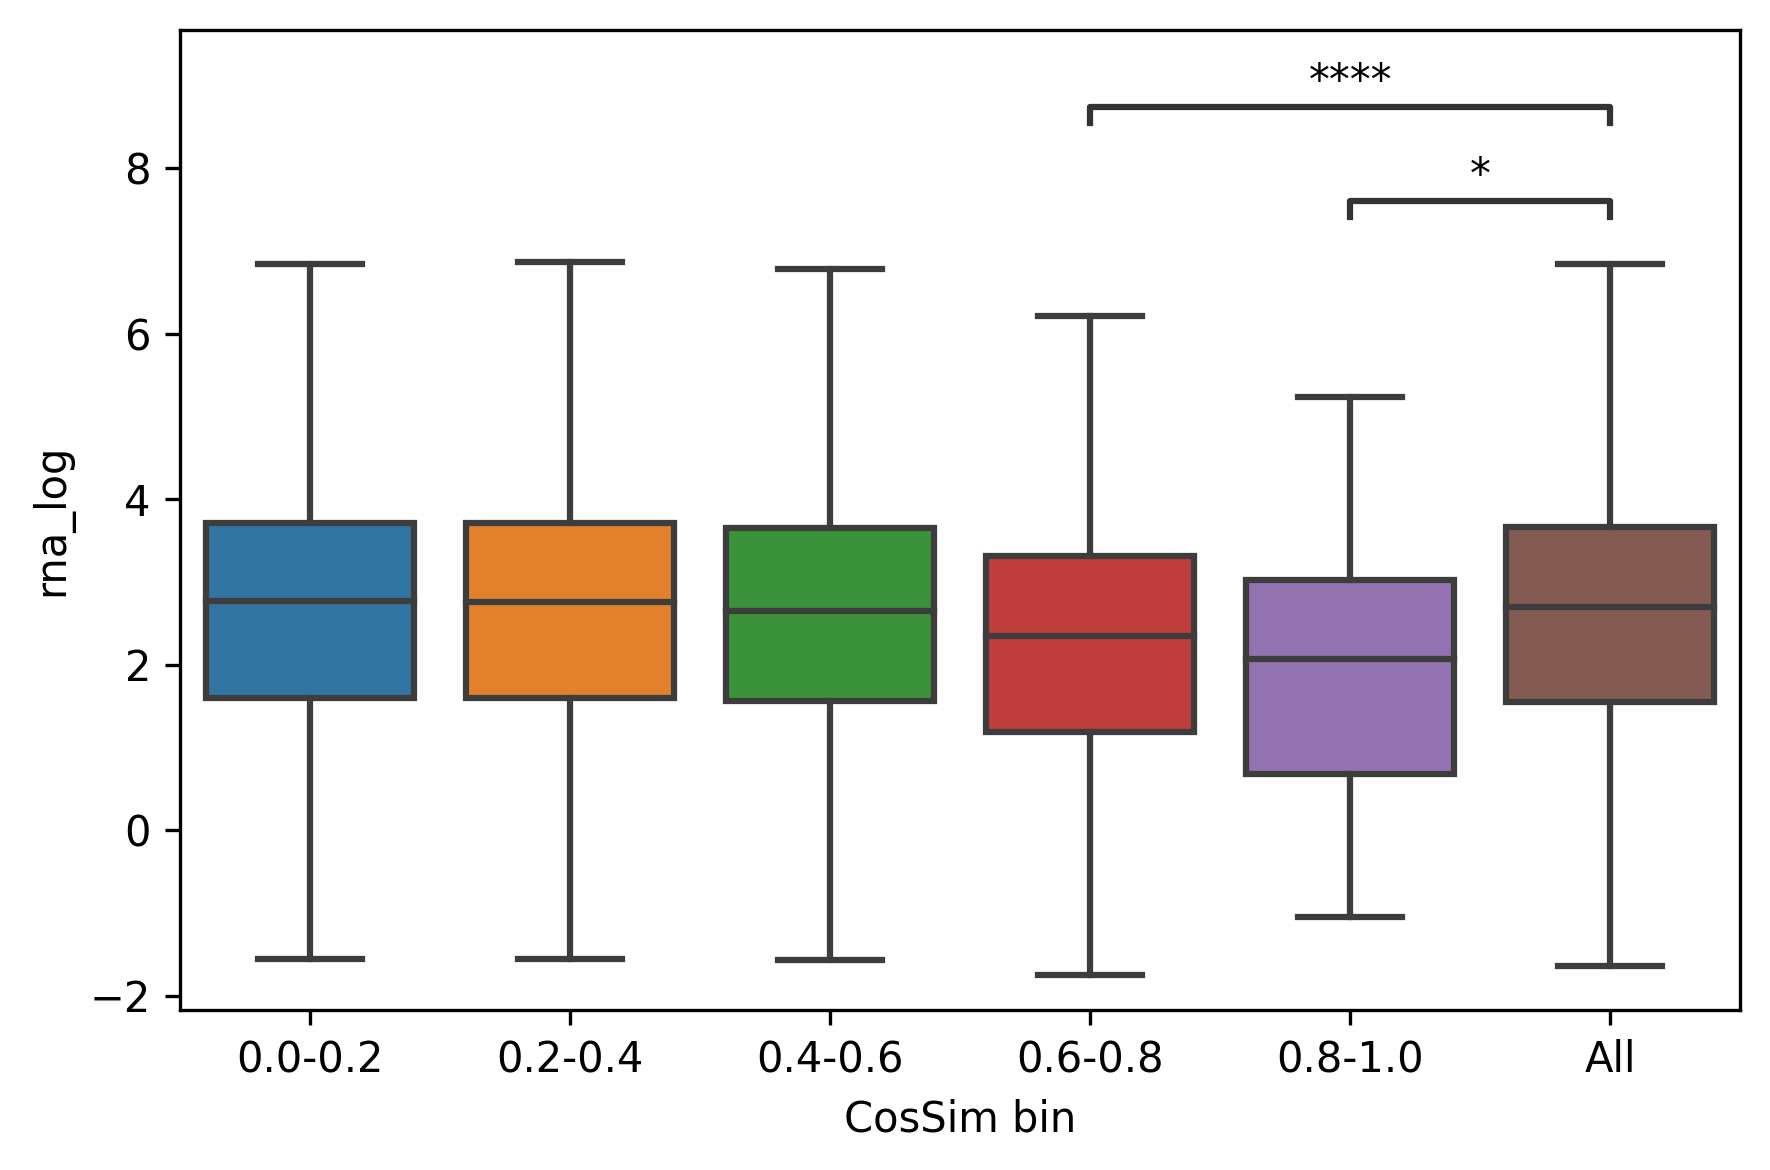

In [30]:
from statannotations.Annotator import Annotator
figsize = (6,4)
target = 'rna_log'
xlabel='CosSim bin'
data_list = violin_data_dic[target]
all_data = df_concat_cl[target].values
fig, ax = plt.subplots(1, 1, figsize=figsize)
pairs=[(tick_names[-3],tick_names[-1]),(tick_names[-2],tick_names[-1])]
#pairs = [(tick_names[-2],tick_names[-1])]

pvalues = [stats.ttest_ind(data_list[-2],all_data, equal_var=False)[-1],
           stats.ttest_ind(data_list[-1],all_data, equal_var=False)[-1]
           ]

target_val = np.append(np.concatenate([lis for lis in violin_data_dic[target]]),df_concat_cl[target].values)
labels = np.append(np.concatenate([np.repeat(f'{label}', len(lis)) for label,lis in zip(tick_names,violin_data_dic[target]) ]),np.repeat('All',len(df_concat_cl)))
data = {target: target_val,
        xlabel: labels}

df = pd.DataFrame(data)
# Seabornのboxplotを使用
plot_params = {
    'data':df,
    'x':xlabel,
    'y':target,
    'showfliers':False,
}
sns.boxplot(**plot_params)
annotator = Annotator(ax,pairs,**plot_params)
annotator.set_pvalues(pvalues)
annotator.annotate()
plt.tight_layout()
plt.savefig(f'./results/imgs/{target}_boxplot_with_pvalue_HEK293iwasaki')

In [8]:
## For correlation
df_concat_cl = df_concat_cl[df_concat_cl["cos_sim"]>0]
pred_val=df_concat_cl["cos_sim"].values
label = "TPM_ribo"
log_te = np.log(df_concat_cl[label].values)

#plt.scatter(pred_val,log_te)
pearson,_ = pearsonr(pred_val,log_te)
spearman,_ = spearmanr(pred_val,log_te)
plt.scatter(pred_val,log_te,label=f"pear:{pearson:.3f}\nspea:{spearman:.3f}")
plt.xlabel("cos sim")
plt.ylabel("log(TE)")
plt.title("HEK293_TE_Iwasaki-lab")
plt.legend()
plt.tight_layout()
#plt.savefig(f"results/imgs/iwasaki_lab_HEK293_{label}_corr")
print(f"pearson:{pearson}")
print(f"spearman:{spearman}")

NameError: name 'df_concat_cl' is not defined

### 3.2 iPS

In [23]:
te_df = pd.read_csv("/home/ksuga/whole_mrna_predictor/UTR_PairPred/data/iwasaki_lab/Human_iPS/SIKT10/Human_iPS_Kera1_TE.csv",index_col=0)
te_df['te_log'] = np.log(te_df['TE'])
te_df['ribo_log'] = np.log(te_df['TPM_ribo'])
te_df['rna_log'] = np.log(te_df['TPM_rna'])
df_concat_cl=pd.merge(te_df,tot_df_cl,on="ENST_ID",how="inner")
#df_concat_mlp = pd.merge(te_df,tot_df_mlp,on="ENST_ID",how="inner")

In [24]:
thresh = np.arange(0,1.1,0.2)
bin_dic = dict()
target_labels= ['TE','TPM_ribo','TPM_rna','te_log','ribo_log','rna_log']
for i in range(len(thresh)-1):
    upper_th = thresh[i+1]
    lower_th = thresh[i]
    tmp_df = df_concat_cl[(df_concat_cl['cos_sim']>lower_th)&(df_concat_cl['cos_sim']<upper_th)].describe()
    tmp_dic = tmp_df.loc['mean',target_labels]
    tmp_dic['count'] = tmp_df.loc['count'].values[0]
    bin_dic[f"{lower_th:.1f}-{upper_th:.1f}"] = tmp_dic
bin_dic['All'] = dict(df_concat_cl.describe().loc['mean',target_labels])
bin_df = pd.DataFrame(bin_dic).T
bin_df

,TE,TPM_ribo,TPM_rna,count,ribo_log,rna_log,te_log
0.0-0.2,14.875925,71.349669,89.160687,1541.0,3.110213,2.800873,0.309340
0.2-0.4,19.733821,72.148825,80.270330,1994.0,3.091367,2.717220,0.374147
0.4-0.6,18.884736,101.089084,55.268711,1228.0,2.985009,2.715125,0.269884
0.6-0.8,27.476650,83.396300,54.848112,350.0,2.846433,2.696827,0.149605
0.8-1.0,12.300761,18.873772,21.088241,28.0,2.324052,1.625127,0.698925
All,17.758658,81.953411,75.474618,NaN,3.059282,2.749404,0.309879


In [25]:
# for violin plot
thresh = np.arange(0,1.1,0.2)
labels = ["TE",'TPM_ribo','TPM_rna','te_log','ribo_log','rna_log']
tick_names =[]
violin_data_dic={label:[] for label in labels}
for i in range(len(thresh)-1):
    upper_th = thresh[i+1]
    lower_th = thresh[i]
    tmp_df = df_concat_cl[(df_concat_cl['cos_sim']>lower_th)&(df_concat_cl['cos_sim']<upper_th)]
    for l in labels:
        violin_data_dic[l].append(tmp_df[l].values)
    #tmp_dic['count'] = tmp_df.loc['count'].values[0]
    tick_names.append(f"{lower_th:.1f}-{upper_th:.1f}")
tick_names.append('All')

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

0.8-1.0 vs. All: Custom statistical test, P_val:3.056e-01
0.6-0.8 vs. All: Custom statistical test, P_val:7.288e-02


(<Axes: xlabel='CosSim bin', ylabel='te_log'>,
  <statannotations.Annotation.Annotation at 0x7f304ee1a2e0>])

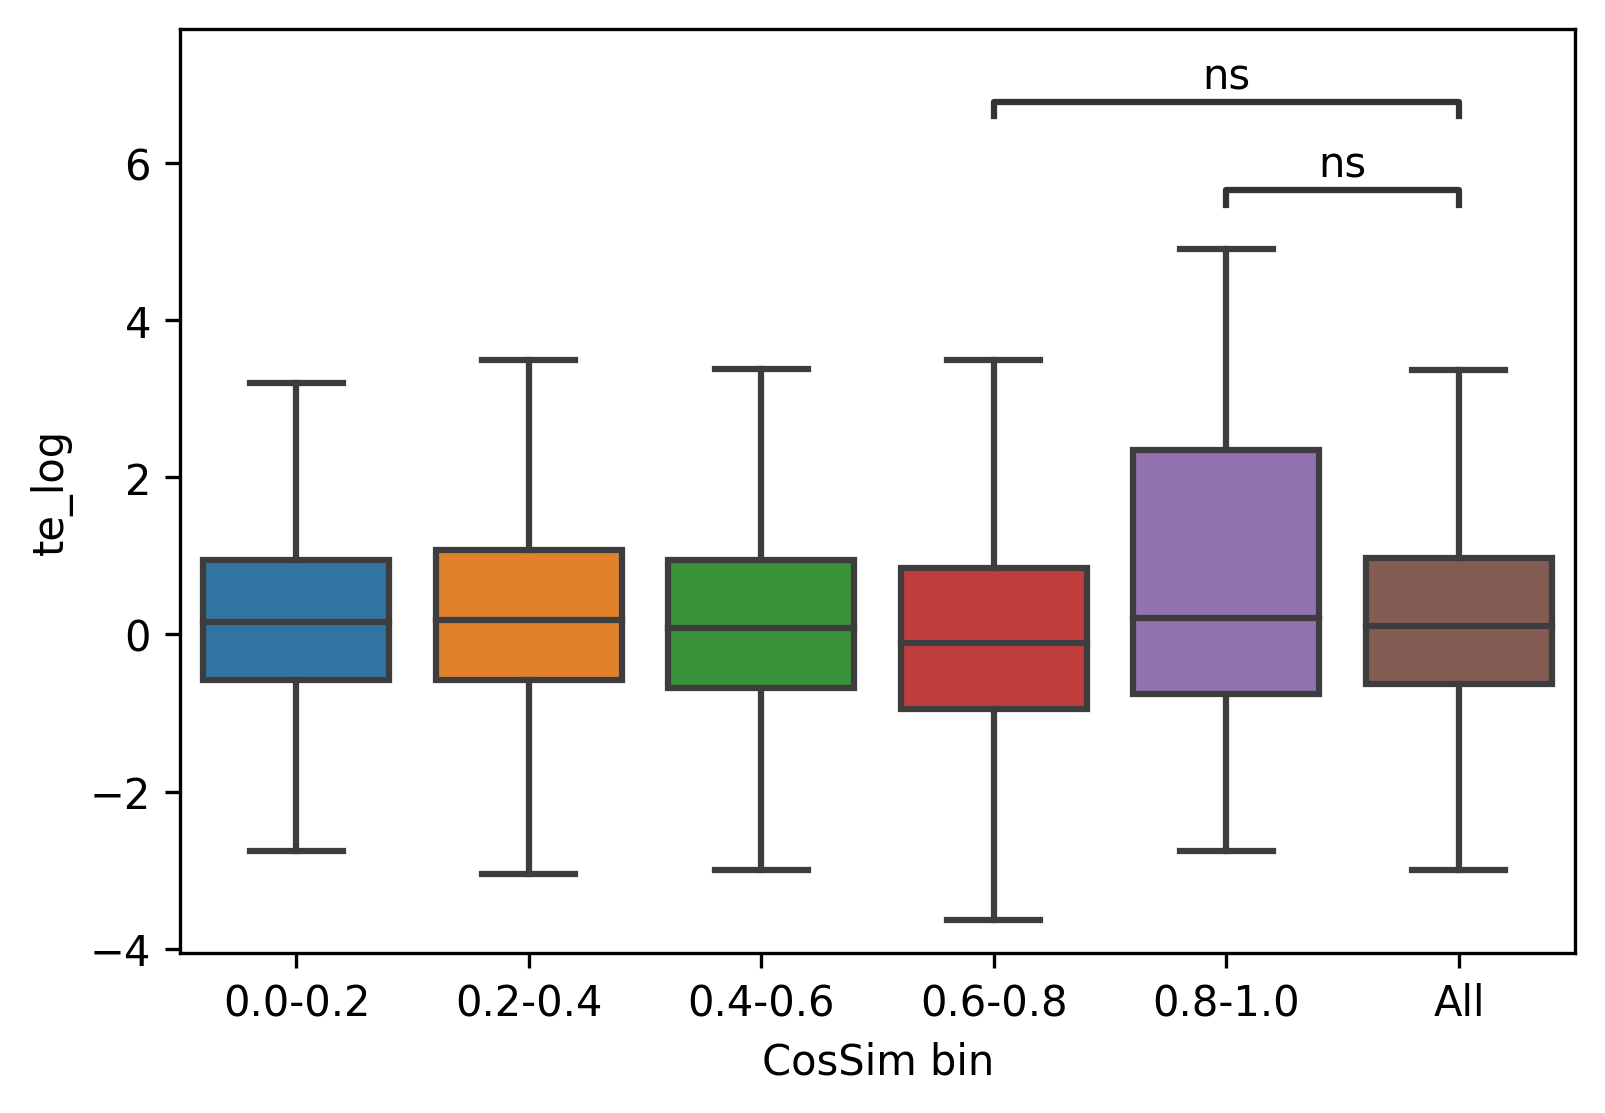

In [26]:
from statannotations.Annotator import Annotator
figsize = (6,4)
target = 'te_log'
xlabel='CosSim bin'
data_list = violin_data_dic[target]
all_data = df_concat_cl[target].values
fig, ax = plt.subplots(1, 1, figsize=figsize)
pairs=[(tick_names[-3],tick_names[-1]),(tick_names[-2],tick_names[-1])]

pvalues = [stats.ttest_ind(data_list[-2],all_data, equal_var=False)[-1],
           stats.ttest_ind(data_list[-1],all_data, equal_var=False)[-1]
           ]


target_val = np.append(np.concatenate([lis for lis in violin_data_dic[target]]),df_concat_cl[target].values)
labels = np.append(np.concatenate([np.repeat(f'{label}', len(lis)) for label,lis in zip(tick_names,violin_data_dic[target]) ]),np.repeat('All',len(df_concat_cl)))
data = {target: target_val,
        xlabel: labels}

df = pd.DataFrame(data)
# Seabornのboxplotを使用
plot_params = {
    'data':df,
    'x':xlabel,
    'y':target,
    'showfliers':False,
}
sns.boxplot(**plot_params)
annotator = Annotator(ax,pairs,**plot_params)
annotator.set_pvalues(pvalues)
annotator.annotate()


<Figure size 1950x1200 with 0 Axes>

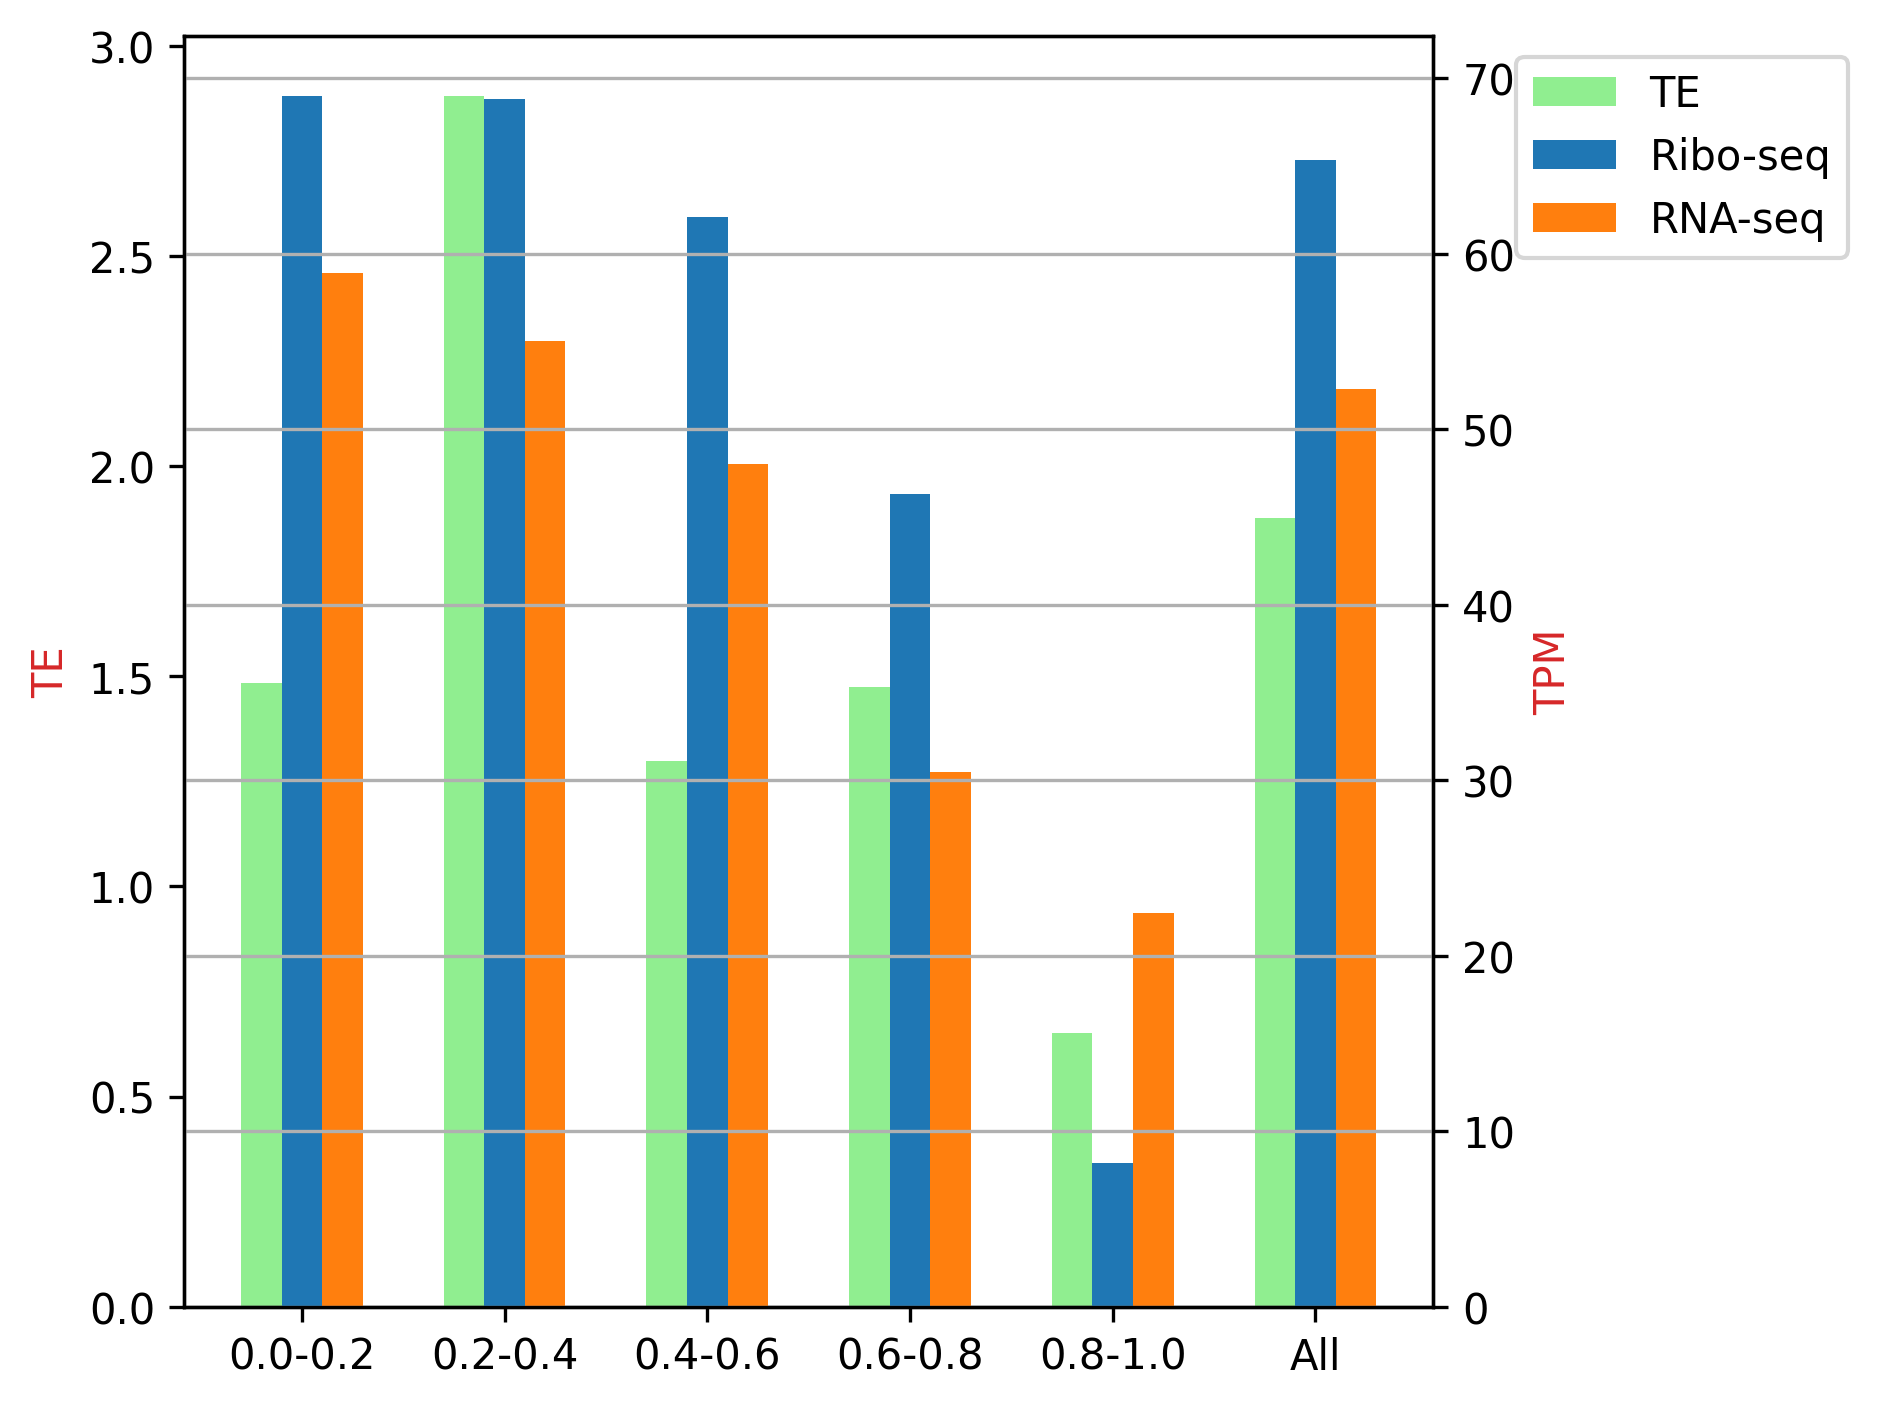

In [144]:
fig = plt.figure(figsize=(6.5,4))
# 3つのデータセットを作成
data1 = bin_df['TE'].values
data2 = bin_df['TPM_ribo'].values
data3 = bin_df['TPM_rna'].values

# x軸のticksの位置
ticks = np.arange(len(data1))
ticks_name = bin_df.index.values
width = 0.2  # 棒の幅

fig, ax1 = plt.subplots()
bar1=ax1.bar(ticks - width, data1, width,color='lightgreen', label='TE')
ax1.set_ylabel('TE', color=color)

# 3つの棒グラフを描画

ax2 = ax1.twinx()
bar2=ax2.bar(ticks, data2, width, label='Ribo-seq')
bar3=ax2.bar(ticks + width, data3, width, label='RNA-seq')
# x軸のticksを設定
plt.xticks(ticks,ticks_name)
ax2.set_ylabel('TPM', color=color)
plt.xlabel('CosSim bin')
plt.ylabel('TPM')
plt.grid()
bars=[bar1,bar2,bar3]
labels = [bar.get_label() for bar in bars]
ax1.legend(bars,labels,loc='upper left', bbox_to_anchor=(1.05,1))

plt.tight_layout()
plt.savefig('./results/imgs/TE_barplot_iPSiwasaki')

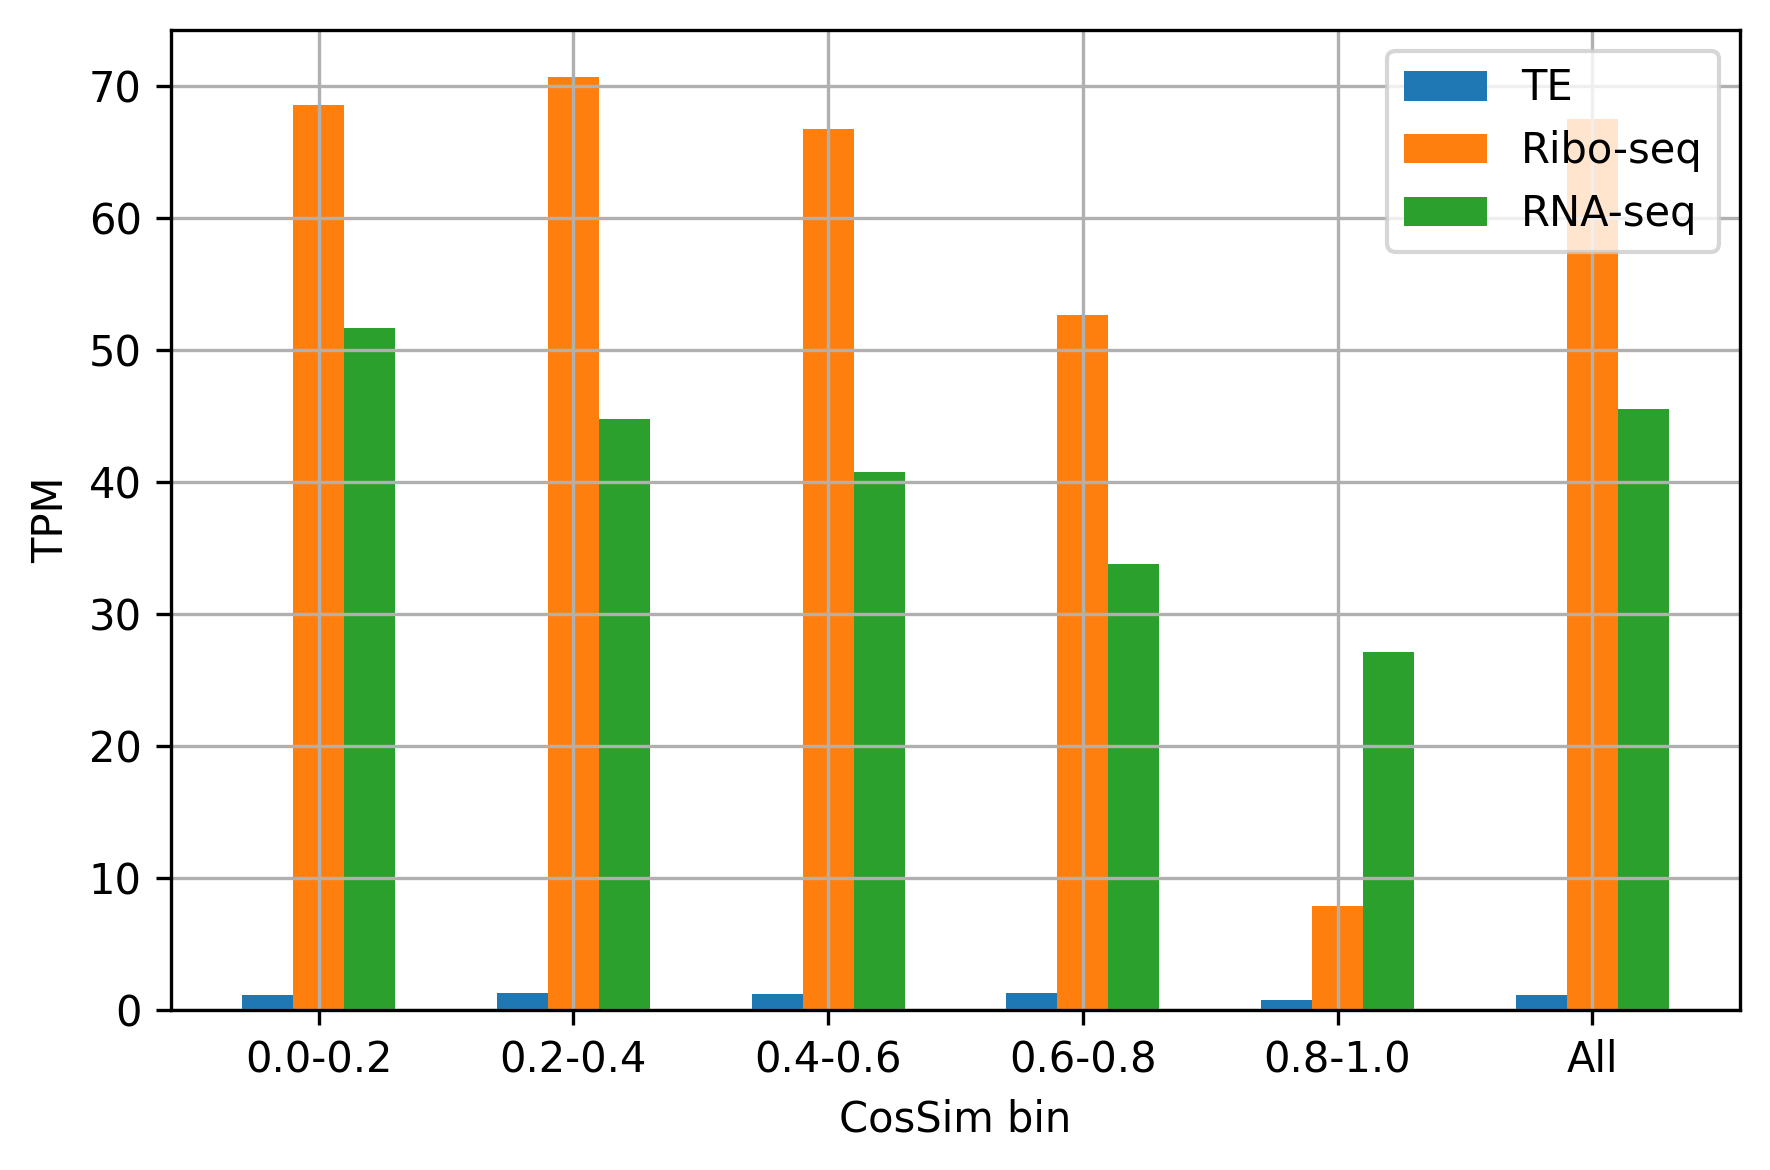

In [116]:
fig = plt.figure(figsize=(6,4))
# 3つのデータセットを作成
data1 = bin_df['TE'].values
data2 = bin_df['TPM_ribo'].values
data3 = bin_df['TPM_rna'].values

# x軸のticksの位置
ticks = np.arange(len(data1))
ticks_name = bin_df.index.values

fig, ax1 = plt.subplots()
plt.bar(ticks - width, data1, width, label='TE')

# 3つの棒グラフを描画
width = 0.2  # 棒の幅

plt.bar(ticks - width, data1, width, label='TE')
plt.bar(ticks, data2, width, label='Ribo-seq')
plt.bar(ticks + width, data3, width, label='RNA-seq')
# x軸のticksを設定
plt.xticks(ticks,ticks_name)
plt.xlabel('CosSim bin')
plt.ylabel('TPM')
plt.grid()
plt.legend()
plt.tight_layout()
plt.savefig('./results/imgs/TE_barplot_iPSiwasaki')

### 3.3 HEK293(5utr opt)

In [63]:
te_df = pd.read_table("/home/ksuga/whole_mrna_predictor/UTR_PairPred/data/human/TE/df_counts_and_len.TE_sorted.HEK_Andrev2015.with_annot.txt",sep=" ",index_col=0).dropna()
te_df['te'] = np.log(te_df['te'])
te_df.rename(columns={"ensembl_tx_id":"ENST_ID"},inplace=True)

In [64]:
df_concat_cl=pd.merge(te_df,tot_df_cl,on="ENST_ID",how="inner")
#df_concat_mlp = pd.merge(te_df,tot_df_mlp,on="ENST_ID",how="inner")

In [66]:
thresh = np.arange(0,1.1,0.2)
bin_dic = dict()
for i in range(len(thresh)-1):
    upper_th = thresh[i+1]
    lower_th = thresh[i]
    
    tmp_dic = dict(df_concat_cl[(df_concat_cl['cos_sim']>lower_th)&(df_concat_cl['cos_sim']<upper_th)].describe().loc['mean',['te','rpkm_riboseq','rpkm_rnaseq']])
    bin_dic[f"{lower_th:.1f}-{upper_th:.1f}"] = tmp_dic
bin_dic['All'] = dict(df_concat_cl.describe().loc['mean',['te','rpkm_riboseq','rpkm_rnaseq']])
bin_df = pd.DataFrame(bin_dic).T
bin_df

,te,rpkm_riboseq,rpkm_rnaseq
0.0-0.2,-0.590859,18.632568,18.442983
0.2-0.4,-0.615023,16.021608,15.314251
0.4-0.6,-0.665049,16.719953,15.144494
0.6-0.8,-0.682139,11.221728,7.431778
0.8-1.0,-0.584075,2.949817,5.530475
All,-0.631368,17.156783,16.053331


### 3.4 PC3 (5utr opt)

In [146]:
te_df = pd.read_table("/home/ksuga/whole_mrna_predictor/UTR_PairPred/data/human/TE/df_counts_and_len.TE_sorted.pc3.with_annot.txt",sep=" ",index_col=0).dropna()
te_df.rename(columns={"ensembl_tx_id":"ENST_ID"},inplace=True)
df_concat_cl=pd.merge(te_df,tot_df_cl,on="ENST_ID",how="inner")
#df_concat_mlp = pd.merge(te_df,tot_df_mlp,on="ENST_ID",how="inner")

In [147]:
te_df

,riboseq_counts,rnaseq_counts,cds_length,total_mapped_riboseq,total_mapped_rnaseq,rpkm_riboseq,rpkm_rnaseq,te,norm_riboseq,norm_rnaseq,ENST_ID,entrez,external_gene_id,transcript_biotype
ENST00000369158.1,746.0,1.0,411,443495278,864274341,4.092682,0.002815,1453.789229,1.815085,0.002433,ENST00000369158,126961.0,HIST2H3C,protein_coding
ENST00000305910.3,566.0,1.0,411,443495278,864274341,3.105172,0.002815,1103.008986,1.377129,0.002433,ENST00000305910,8350.0,HIST1H3G,protein_coding
ENST00000259791.2,36000.0,130.0,393,443495278,864274341,206.547979,0.382736,539.661912,91.603053,0.330789,ENST00000259791,3012.0,HIST1H2AB,protein_coding
ENST00000446824.2,61082.0,363.0,411,443495278,864274341,335.106172,1.021911,327.921010,148.618005,0.883212,ENST00000446824,8350.0,HIST1H3F,protein_coding
ENST00000569337.1,502.0,3.0,189,443495278,864274341,5.988981,0.018366,326.095707,2.656085,0.015873,ENST00000569337,197131.0,UBR1,nonsense_mediated_decay
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENST00000560748.1,2.0,5647.0,954,443495278,864274341,0.004727,6.848852,0.000690,0.002096,5.919287,ENST00000560748,122416.0,ANKRD9,protein_coding
ENST00000217075.2,1.0,2961.0,516,443495278,864274341,0.004370,6.639526,0.000658,0.001938,5.738372,ENST00000217075,80336.0,PABPC1L,protein_coding
ENST00000559404.1,1.0,4491.0,779,443495278,864274341,0.002894,6.670432,0.000434,0.001284,5.765083,ENST00000559404,122416.0,ANKRD9,protein_coding
ENST00000334586.5,1.0,16972.0,1239,443495278,864274341,0.001820,15.849300,0.000115,0.000807,13.698144,ENST00000334586,353174.0,ZACN,protein_coding


In [148]:
thresh = np.arange(0,1.1,0.2)
bin_dic = dict()
for i in range(len(thresh)-1):
    upper_th = thresh[i+1]
    lower_th = thresh[i]
    
    tmp_dic = dict(df_concat_cl[(df_concat_cl['cos_sim']>lower_th)&(df_concat_cl['cos_sim']<upper_th)].describe().loc['mean',['te','rpkm_riboseq','rpkm_rnaseq']])
    bin_dic[f"{lower_th:.1f}-{upper_th:.1f}"] = tmp_dic
bin_dic['All'] = dict(df_concat_cl.describe().loc['mean',['te','rpkm_riboseq','rpkm_rnaseq']])
bin_df = pd.DataFrame(bin_dic).T
bin_df

,te,rpkm_riboseq,rpkm_rnaseq
0.0-0.2,1.064586,18.424477,17.643608
0.2-0.4,1.730685,22.052151,18.475249
0.4-0.6,1.367006,17.169135,14.753280
0.6-0.8,2.313885,14.982864,9.587004
0.8-1.0,0.827399,2.547106,3.832174
All,1.429558,20.052979,17.502581


In [149]:
thresh = np.arange(0,1.1,0.2)
bin_dic = dict()
target=['te','rpkm_riboseq','rpkm_rnaseq']
for i in range(len(thresh)-1):
    upper_th = thresh[i+1]
    lower_th = thresh[i]
    tmp_df = df_concat_cl[(df_concat_cl['cos_sim']>lower_th)&(df_concat_cl['cos_sim']<upper_th)].describe()
    tmp_dic = tmp_df.loc['mean',target]
    tmp_dic['count'] = tmp_df.loc['count'].values[0]
    bin_dic[f"{lower_th:.1f}-{upper_th:.1f}"] = tmp_dic
bin_dic['All'] = dict(df_concat_cl.describe().loc['mean',target])
bin_df = pd.DataFrame(bin_dic).T
bin_df

,count,rpkm_riboseq,rpkm_rnaseq,te
0.0-0.2,2643.0,18.424477,17.643608,1.064586
0.2-0.4,3215.0,22.052151,18.475249,1.730685
0.4-0.6,1987.0,17.169135,14.753280,1.367006
0.6-0.8,604.0,14.982864,9.587004,2.313885
0.8-1.0,44.0,2.547106,3.832174,0.827399
All,NaN,20.052979,17.502581,1.429558


In [150]:
# for violin plot
thresh = np.arange(0,1.1,0.2)
labels = ['te','rpkm_riboseq','rpkm_rnaseq']
tick_names =[]
violin_data_dic={label:[] for label in labels}
for i in range(len(thresh)-1):
    upper_th = thresh[i+1]
    lower_th = thresh[i]
    tmp_df = df_concat_cl[(df_concat_cl['cos_sim']>lower_th)&(df_concat_cl['cos_sim']<upper_th)]
    for l in labels:
        violin_data_dic[l].append(tmp_df[l].values)
    #tmp_dic['count'] = tmp_df.loc['count'].values[0]
    tick_names.append(f"{lower_th:.1f}-{upper_th:.1f}")
tick_names.append('All')

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

0.8-1.0 vs. All: Custom statistical test, P_val:2.653e-02


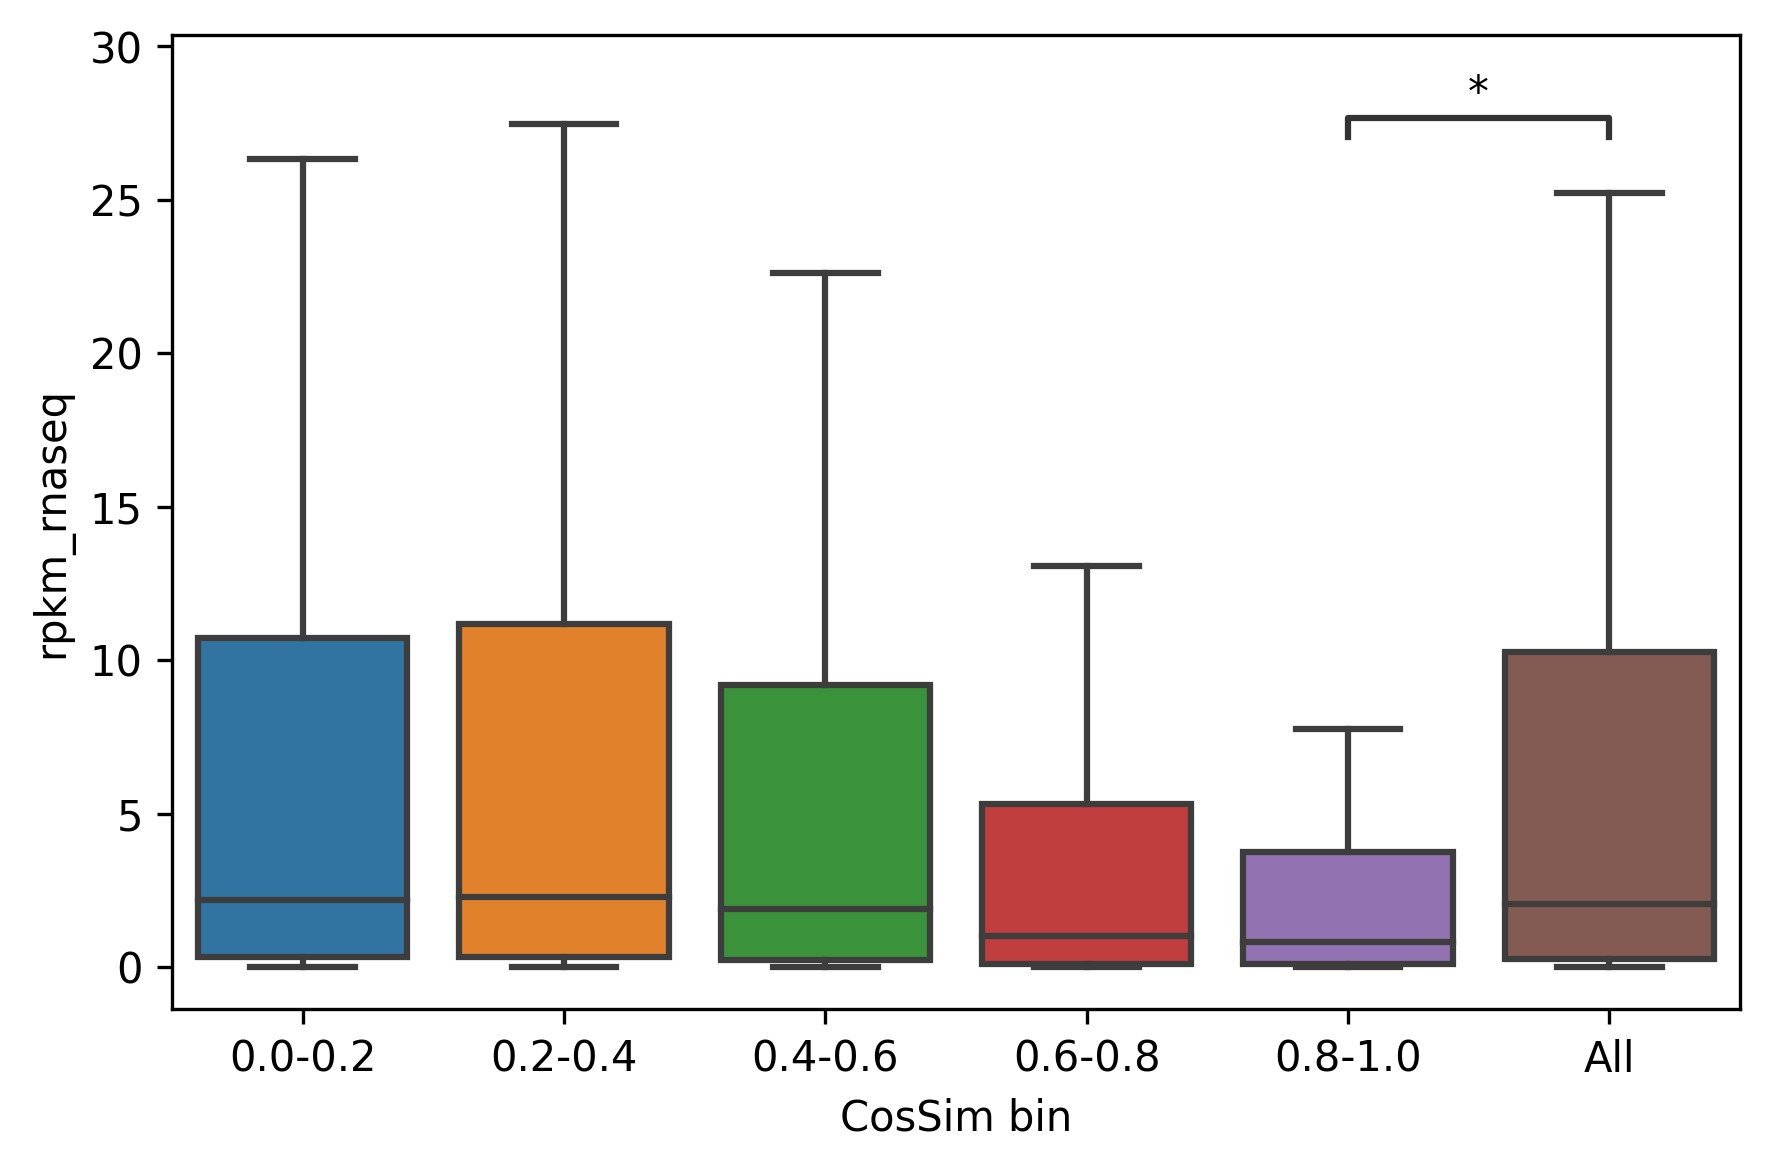

In [154]:
from statannotations.Annotator import Annotator
figsize = (6,4)
target = 'rpkm_rnaseq'
xlabel='CosSim bin'
data_list = violin_data_dic[target]
all_data = df_concat_cl[~((df_concat_cl['cos_sim']>0.8)&(df_concat_cl['cos_sim']<1))][target].values

fig, ax = plt.subplots(1, 1, figsize=figsize)
pairs=[(tick_names[-2],tick_names[-1])]
#pairs = [(tick_names[-2],tick_names[-1])]

pvalues = [
           stats.mannwhitneyu(data_list[-1],all_data)[-1]
           ]

target_val = np.append(np.concatenate([lis for lis in violin_data_dic[target]]),df_concat_cl[target].values)
labels = np.append(np.concatenate([np.repeat(f'{label}', len(lis)) for label,lis in zip(tick_names,violin_data_dic[target]) ]),np.repeat('All',len(df_concat_cl)))
data = {target: target_val,
        xlabel: labels}

df = pd.DataFrame(data)
# Seabornのboxplotを使用
plot_params = {
    'data':df,
    'x':xlabel,
    'y':target,
    'showfliers':False,
}
sns.boxplot(**plot_params)
annotator = Annotator(ax,pairs,**plot_params)
annotator.set_pvalues(pvalues)
annotator.annotate()
plt.tight_layout()
#plt.savefig(f'./results/imgs/{target}_boxplot_with_pvalue_HEK293iwasaki')

### 3.5 Brain ribo-seq 

In [159]:
#ribo = pd.read_table('/home/ksuga/whole_mrna_predictor/UTR_PairPred/Biocontainer-pipeline/output/SRR1562539/SRR1562539_sub.isoforms.results',sep="\t")
ribo = pd.read_csv('/home/ksuga/whole_mrna_predictor/UTR_PairPred/Biocontainer-pipeline/output/SRR1562539/ReadCount.csv',index_col=0).rename(columns={'TPM':'TPM_ribo','TPM_cds':'TPM_cds_ribo'})
ribo_cds = pd.read_csv('/home/ksuga/whole_mrna_predictor/UTR_PairPred/Biocontainer-pipeline/output/SRR1562539/ReadCount_cds.csv',index_col=0).rename(columns={'TPM_cds':'TPM_cds_ribo'})
#ribo_utr = pd.read_csv('/home/ksuga/whole_mrna_predictor/UTR_PairPred/Biocontainer-pipeline/output/SRR1562539/ReadCount_utr3.csv',index_col=0)
rna = pd.read_csv('/home/ksuga/whole_mrna_predictor/UTR_PairPred/Biocontainer-pipeline/output/SRR1562544/ReadCount.csv',index_col=0).rename(columns={'TPM':'TPM_rna','TPM_cds':'TPM_cds_rna'})
remover=lambda x:x.split('.')[0]

ribo['ENST_ID']=ribo['transcript_id'].apply(remover)
ribo_cds['ENST_ID']=ribo_cds['transcript_id'].apply(remover)
rna['ENST_ID']=rna['transcript_id'].apply(remover)

df_concat_cl=pd.merge(tot_df_cl,ribo_cds,on='ENST_ID',how='inner')
df_concat_cl=pd.merge(df_concat_cl,rna,on='ENST_ID',how='inner')
df_concat_cl=df_concat_cl[df_concat_cl['CDS_len_y']!=0]
df_concat_cl=df_concat_cl[(df_concat_cl['TPM_cds_rna']!=0)&(df_concat_cl['TPM_cds_ribo']!=0)]
df_concat_cl['TE'] = df_concat_cl['TPM_cds_ribo']/df_concat_cl['TPM_cds_rna']

In [160]:
thresh = np.arange(0,1.1,0.2)
bin_dic = dict()
target_labels= ['TE','TPM_cds_ribo','TPM_cds_rna']
for i in range(len(thresh)-1):
    upper_th = thresh[i+1]
    lower_th = thresh[i]
    tmp_df = df_concat_cl[(df_concat_cl['cos_sim']>lower_th)&(df_concat_cl['cos_sim']<upper_th)].describe()
    tmp_dic = tmp_df.loc['mean',target_labels]
    tmp_dic['count'] = tmp_df.loc['count'].values[0]
    bin_dic[f"{lower_th:.1f}-{upper_th:.1f}"] = tmp_dic
bin_dic['All'] = dict(df_concat_cl.describe().loc['mean',target_labels],count=len(df_concat_cl))
bin_df = pd.DataFrame(bin_dic).T
bin_df

,TE,TPM_cds_ribo,TPM_cds_rna,count
0.0-0.2,1.187084,26.124932,36.608871,2721.0
0.2-0.4,1.362622,28.963284,38.616477,3266.0
0.4-0.6,4.235792,26.715849,34.802441,2109.0
0.6-0.8,4.211256,27.804897,46.392189,684.0
0.8-1.0,0.780632,24.857124,61.377690,62.0
All,2.059885,27.837479,36.591940,10390.0


In [ ]:
thresh = np.arange(0,1.1,0.2)
bin_dic = dict()
target_labels= ['TE','TPM_cds_ribo','TPM_cds_rna']
for i in range(len(thresh)-1):
    upper_th = thresh[i+1]
    lower_th = thresh[i]
    tmp_df = df_concat_cl[(df_concat_cl['cos_sim']>lower_th)&(df_concat_cl['cos_sim']<upper_th)].describe()
    tmp_dic = tmp_df.loc['mean',target_labels]
    tmp_dic['count'] = tmp_df.loc['count'].values[0]
    bin_dic[f"{lower_th:.1f}-{upper_th:.1f}"] = tmp_dic
bin_dic['All'] = dict(df_concat_cl.describe().loc['mean',target_labels],count=len(df_concat_cl))
bin_df = pd.DataFrame(bin_dic).T
bin_df

In [161]:
# for violin plot
thresh = np.arange(0,1.1,0.2)
labels = ['TE','TPM_cds_ribo','TPM_cds_rna']
tick_names =[]
violin_data_dic={label:[] for label in labels}
for i in range(len(thresh)-1):
    upper_th = thresh[i+1]
    lower_th = thresh[i]
    tmp_df = df_concat_cl[(df_concat_cl['cos_sim']>lower_th)&(df_concat_cl['cos_sim']<upper_th)]
    for l in labels:
        violin_data_dic[l].append(tmp_df[l].values)
    #tmp_dic['count'] = tmp_df.loc['count'].values[0]
    tick_names.append(f"{lower_th:.1f}-{upper_th:.1f}")
tick_names.append('All')

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

0.8-1.0 vs. All: Custom statistical test, P_val:1.352e-01


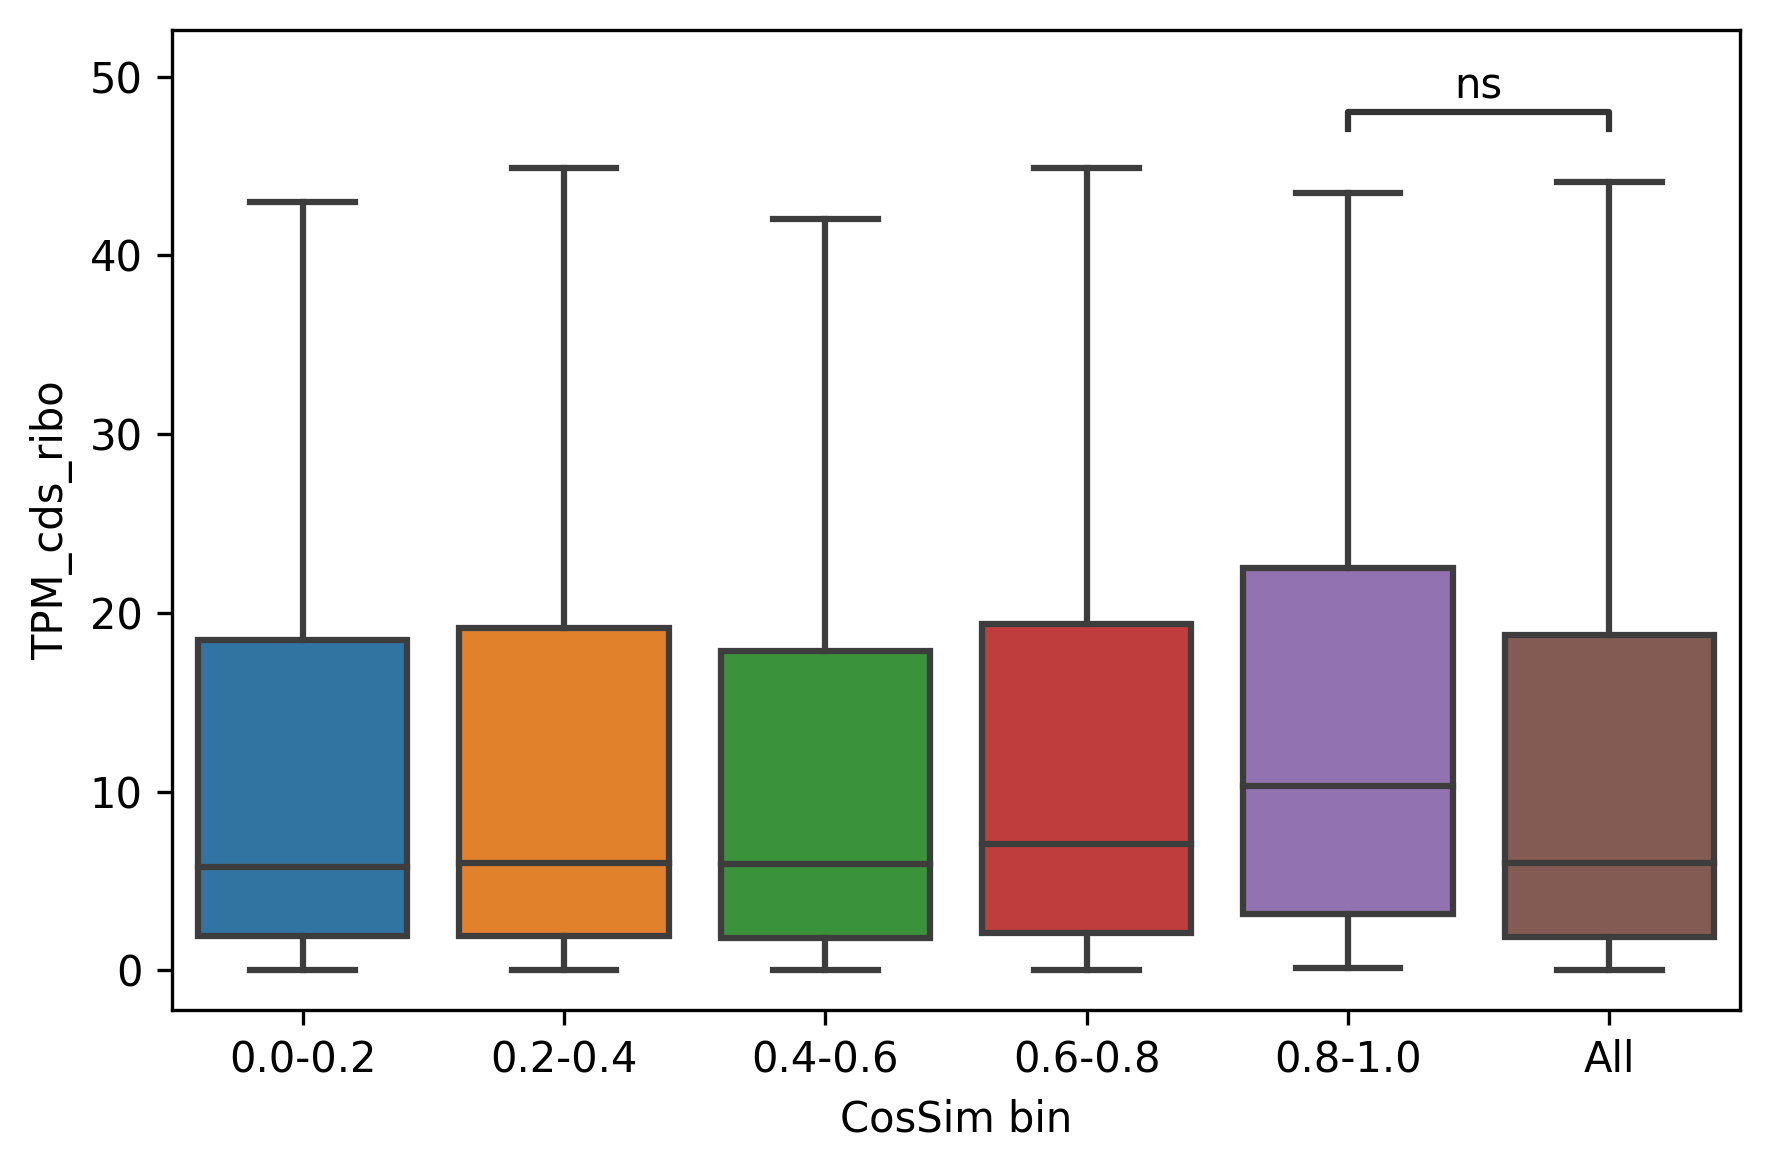

In [163]:
from statannotations.Annotator import Annotator
figsize = (6,4)
target = 'TPM_cds_ribo'
xlabel='CosSim bin'
data_list = violin_data_dic[target]
all_data = df_concat_cl[~((df_concat_cl['cos_sim']>0.8)&(df_concat_cl['cos_sim']<1))][target].values

fig, ax = plt.subplots(1, 1, figsize=figsize)
pairs=[(tick_names[-2],tick_names[-1])]

pvalues = [
           stats.mannwhitneyu(data_list[-1],all_data)[-1]
           ]

target_val = np.append(np.concatenate([lis for lis in violin_data_dic[target]]),df_concat_cl[target].values)
labels = np.append(np.concatenate([np.repeat(f'{label}', len(lis)) for label,lis in zip(tick_names,violin_data_dic[target]) ]),np.repeat('All',len(df_concat_cl)))
data = {target: target_val,
        xlabel: labels}

df = pd.DataFrame(data)
# Seabornのboxplotを使用
plot_params = {
    'data':df,
    'x':xlabel,
    'y':target,
    'showfliers':False,
}
sns.boxplot(**plot_params)
annotator = Annotator(ax,pairs,**plot_params)
annotator.set_pvalues(pvalues)
annotator.annotate()
plt.tight_layout()
#plt.savefig(f'./results/imgs/{target}_boxplot_with_pvalue_HEK293iwasaki')

In [41]:
## Check TPM for target Gene Ontology
with open("./data/human/go_enst_table.pkl","rb") as f:
    go_enst_table,enst_go_table = pickle.load(f)

target_go_id = ["GO:0032502","GO:0007420"] #developmental process
target_enst_id = []
for go_id in target_go_id:
    target_enst_id.extend(go_enst_table[go_id])
print(len(target_enst_id))
df_concat_cl[df_concat_cl['ENST_ID'].isin(target_enst_id)].describe().loc['mean',target_labels]

527


TPM_cds_ribo    15.741983
TPM_cds_rna     22.065624
Name: mean, dtype: float64

## 4.Analysis for crafted features

In [5]:
cl_dir = "/home/ksuga/whole_mrna_predictor/UTR_PairPred/results/runs/contrastive_learning_10fold_shuffle_seed0"
cl_mouse_dir = "/home/ksuga/whole_mrna_predictor/UTR_PairPred/results/runs/mouse_contrastive_learning_10fold_shuffle_seed0"
mlp_dir = "/home/ksuga/whole_mrna_predictor/UTR_PairPred/results/runs/MLP_split_large_ave_10fold_shuffle_seed1"

tot_df_cl = create_total_df(cl_dir,seq_df)
#tot_df_mlp = create_total_df_sv(mlp_dir,seq_df)

tot_df_cl=tot_df_cl.drop("ENST_ID",axis=1).rename(columns={"ENST_ID_PRE":"ENST_ID"})
#tot_df_mlp=tot_df_mlp.drop("ENST_ID",axis=1).rename(columns={"ENST_ID_PRE":"ENST_ID"})

In [6]:
df_5utr = pd.read_csv("./data/human/gencode44_utr_gene_unique_cdhit09_max10k_feature_5utr.csv",index_col=0).iloc[:,:9].reset_index().rename(columns={'index':'ENST_ID'})
df_3utr= pd.read_csv("./data/human/gencode44_utr_gene_unique_cdhit09_max10k_feature_3utr.csv",index_col=0).iloc[:,:9].reset_index().rename(columns={'index':'ENST_ID'})
tot_df_cl = create_total_df(cl_dir,seq_df)

In [7]:
df_cl_5utr = pd.merge(tot_df_cl.iloc[:,5:],df_5utr,on="ENST_ID",how="inner")
df_cl_3utr = pd.merge(tot_df_cl.iloc[:,5:],df_3utr,on="ENST_ID",how="inner")

In [52]:
## For 5utr
thresh = np.arange(0,1.1,0.2)
bin_dic = dict()
for i in range(len(thresh)-1):
    upper_th = thresh[i+1]
    lower_th = thresh[i]
    tmp_df = df_cl_5utr[(df_cl_5utr['cos_sim']>lower_th)&(df_cl_5utr['cos_sim']<upper_th)].describe()
    tmp_dic = tmp_df.loc['mean',:]
    bin_dic[f"{lower_th:.1f}-{upper_th:.1f}"] = tmp_dic
bin_dic['All'] = dict(df_cl_5utr.describe().loc['mean'])
bin_df = pd.DataFrame(bin_dic).T
bin_df

,logits,cos_sim,total_len,5UTR_len,CDS_len,3UTR_len,A,T,G,C,CGperc,CGratio,ATratio,Length,energy_whole
0.0-0.2,0.527031,0.108315,3768.340725,284.915594,1644.393419,1839.031712,57.708870,58.164044,86.163567,82.881021,0.632080,1.011144,1.200565,284.915594,-107.571373
0.2-0.4,0.574352,0.299881,4021.432605,300.429317,1677.330884,2043.672404,60.656740,61.515954,90.659834,87.597563,0.631665,1.015929,1.134295,300.429317,-114.064216
0.4-0.6,0.619098,0.486099,4127.725834,306.989356,1755.035961,2065.700518,60.539701,59.902186,94.454258,92.093786,0.626561,1.041353,1.143052,306.989356,-120.325276
0.6-0.8,0.663298,0.678507,4018.990164,345.959016,1838.172131,1834.859016,63.429508,62.362295,109.125410,111.042623,0.628075,1.173586,1.230332,345.959016,-145.441016
0.8-1.0,0.697177,0.834001,5358.770833,458.072917,2196.156250,2704.541667,77.010417,77.625000,146.718750,156.718750,0.646729,1.301147,1.308842,458.072917,-200.896250
All,0.563148,0.257462,3950.109735,298.630750,1719.495821,1931.983164,59.501112,59.657026,90.907883,88.565991,0.629169,1.036878,1.171544,298.630750,-115.032095


In [20]:
## For 3utr
thresh = np.arange(0,1.1,0.2)
bin_dic = dict()
for i in range(len(thresh)-1):
    tmp_dic=dict()
    upper_th = thresh[i+1]
    lower_th = thresh[i]
    tmp_df = df_cl_3utr[(df_cl_3utr['cos_sim']>lower_th)&(df_cl_3utr['cos_sim']<upper_th)]
    #tmp_dic = tmp_df.describe().loc['mean',:]
    tmp_dic['count'] = len(tmp_df)
    
    bin_dic[f"{lower_th:.1f}-{upper_th:.1f}"] = tmp_dic
#bin_dic['All'] = dict(df_cl_3utr.describe().loc['mean'])
bin_df = pd.DataFrame(bin_dic).T
bin_df

,count
0.0-0.2,4194
0.2-0.4,5171
0.4-0.6,3476
0.6-0.8,1220
0.8-1.0,96


p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

0.8-1.0 vs. All: Custom statistical test, P_val:3.776e-04


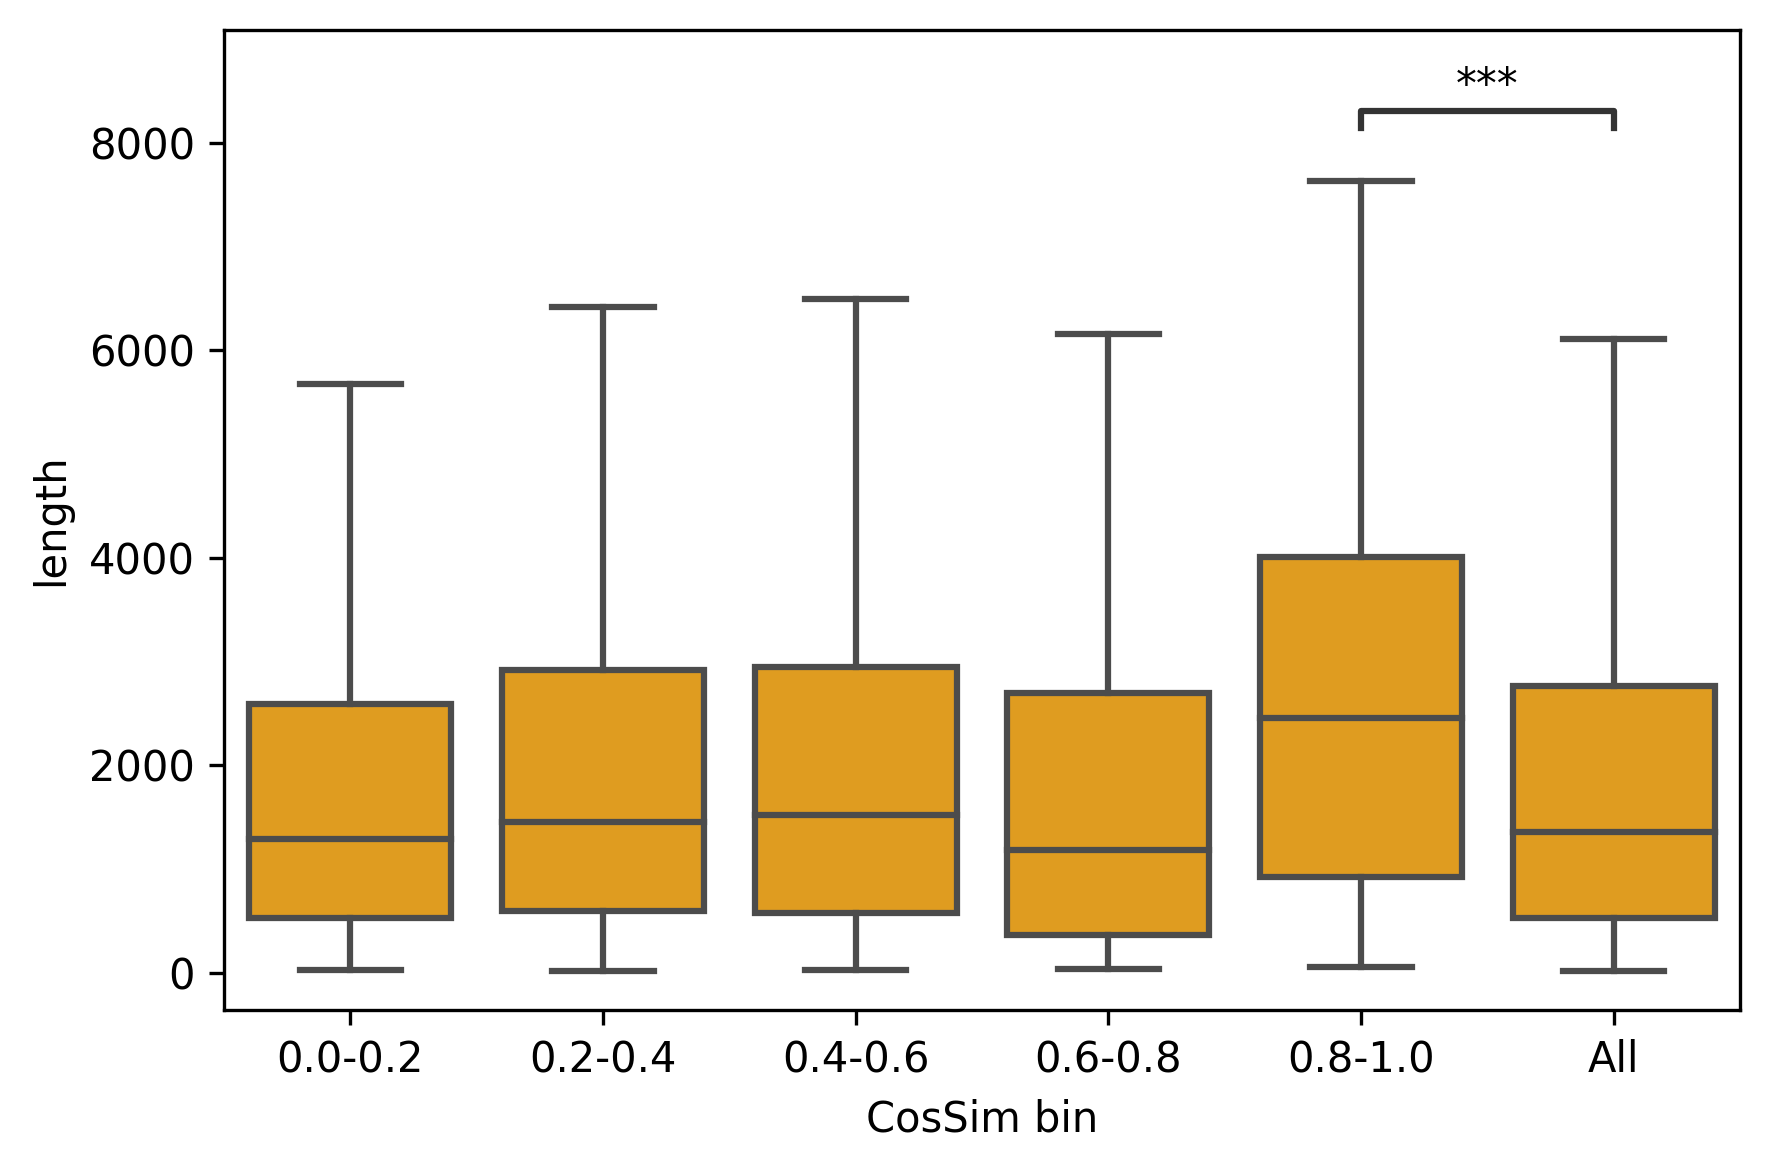

In [51]:
# for violin plot
from statannotations.Annotator import Annotator
thresh = np.arange(0,1.1,0.2)

violin_data_dic={'length':[],'CosSim bin':[]}
hue_dic = {0:'5UTR',1:'3UTR'}
for i in range(len(thresh)-1):
    upper_th = thresh[i+1]
    lower_th = thresh[i]
    for i,df_utr in enumerate([df_cl_3utr]):
        tmp_df = df_utr[(df_utr['cos_sim']>lower_th)&(df_utr['cos_sim']<upper_th)]
        target_data = tmp_df['Length'].values
        violin_data_dic['length'].append(target_data)
        violin_data_dic['CosSim bin'].append([f"{lower_th:.1f}-{upper_th:.1f}"]*len(target_data))
        #violin_data_dic['region'].append([hue_dic[i]]*len(target_data))
    #tmp_dic['count'] = tmp_df.loc['count'].values[0]
    tick_names.append(f"{lower_th:.1f}-{upper_th:.1f}")
tick_names.append('All')

## add all data
violin_data_dic['length'].append(df_cl_3utr['Length'].values)
violin_data_dic['CosSim bin'].append(["All"]*len(df_cl_3utr))

pairs=[(tick_names[-2],tick_names[-1])]
pvalues = [stats.ttest_ind(violin_data_dic['length'][-2],violin_data_dic['length'][-1], equal_var=False)[-1]]

for k,v in violin_data_dic.items():
    violin_data_dic[k] = np.concatenate(v)

df = pd.DataFrame(violin_data_dic)
# Seabornのboxplotを使用
plot_params = {
    'data':df,
    'x':'CosSim bin',
    'y':'length',
    'showfliers':False,
    'color':'orange'
}
figsize=(6,4)
fig, ax = plt.subplots(1, 1, figsize=figsize)
sns.boxplot(**plot_params)
annotator = Annotator(ax,pairs,**plot_params)
annotator.set_pvalues(pvalues)
annotator.annotate()
plt.tight_layout()
#plt.savefig('./results/imgs/CosSimbin_length_boxplot_3utr')

## 5.enrichment GO analysis

In [28]:
import pickle
with open("./data/human/go_enst_table.pkl","rb") as f:
    go_enst_table,enst_go_table = pickle.load(f)

target_go_id = ["GO:0032502"] #developmental process
target_enst_id = []
for go_id in target_go_id:
    target_enst_id.extend(go_enst_table[go_id])
print(len(target_enst_id))

51


In [31]:
seq_df['ENST_ID'] = seq_df['ENST_ID'].apply(remover)
seq_df

,Unnamed: 0,ENST_ID,GENE,5UTR,CDS,3UTR,total_len,5UTR_len,CDS_len,3UTR_len
0,0,ENST00000373091,GRIK3,GUGCGAGCCCGGGCGAUAGCAUCGGCGGCGGCUGGAGGAGGAGCGG...,AUGACCGCUCCCUGGCGGCGCCUCCGGAGUCUGGUUUGGGAAUACU...,GCACAGCUGGGGUGGGGACCUCAGGCCUGGGGGCUGGGCAGAGGAA...,9491,407,2760,6324
1,1,ENST00000291281,PRKD2,ACACUUCCUCCUGGGCCGCCGCCGCCGCCGCCGACUUAAACUUUGG...,AUGGCCACCGCCCCCUCUUAUCCCGCCGGGCUCCCUGGCUCUCCCG...,GGUCCUGUGCCCUCGUCCAGCUGCUGCCCUCCACAGCGGUUCUUCA...,3588,744,2637,207
2,2,ENST00000676318,LRSAM1,CGGUCCCCGUCACCCAAUCCCAGAGCCCCGCCCCUCCCCUGAGGGG...,AUGCCGCUCUUCUUCCGGAAGCGGAAACCCAGUGAGGAGGCUCGGA...,GCAUGGCCGAAAUGGAUGAACGAUUCCAGCAGAUUCUGUCGUGGCA...,5283,434,1263,3586
3,3,ENST00000360803,GTPBP4,GGAAGUUCCGGGAGUGCCAAGUACCCGCGUGCAUACGGCUGCCGGC,AUGGCACAUUACAACUUCAAGAAAAUUACGGUGGUGCCGUCCGCCA...,UAUCCGUUUGGUUGGCGUGGCUUCGCUAGAGUGUUGCUGUUUAUUU...,4656,46,1905,2705
4,4,ENST00000425053,EIF4A2,CUUUUCAGUCGGGCGCUGAGUGGUUUUUCGGAUC,AUGUCUGGUGGCUCCGCGGAUUAUAACAGAGAACAUGGCGGCCCAG...,CAGCAGUUGGUGACGAGAUGGCACUCAGAAACGGCGUUGACGUAAU...,1977,34,1089,854
...,...,...,...,...,...,...,...,...,...,...
16814,16814,ENST00000343546,P4HTM,GAUACUUUUCCCGGAGGCAAGAGGGCGUCUUCACGCAGGCACCGAG...,AUGGCGGCAGCGGCGGUGACAGGCCAGCGGCCUGAGACCGCGGCGG...,GGGAAGAGUUAGCCCCGGUUCCCAGCCGCGGGUCGCCAGUUGCCCA...,2268,368,1692,208
16815,16815,ENST00000617911,PRL,AUCCUUAUUCUAUAUCUCUUGGUAUUUAGUGUAAAAAUUUUAAAAU...,AUGAACAUCAAAGGAUCGCCAUGGAAAGCAGGGUCCCUCCUGCUGC...,GCCCACAUCCAUUUCAUCUAUUUCUGAGAAGGUCCUUAAUGAUCCG...,1364,519,687,158
16816,16816,ENST00000262209,TRPA1,CCAGAAGUUCUCCAGGGCUUCCGCAGAGCGACUUUUUCGCUGCCUG...,AUGAAGCGCAGCCUGAGGAAGAUGUGGCGCCCUGGAGAAAAGAAGG...,CUCCUCAGACCUUCAGUGAGGCUUCUAAUGGGGGGUGCAUGACUUG...,5191,175,3360,1656
16817,16817,ENST00000353265,PARD6G,GAGGCGCGCGGCCAGCCCAGCUCGGGCCCGCAGCACCGGGAGCAGC...,AUGAACCGAAGUUUUCACAAGUCUCAGACCUUGCGAUUCUACGAUU...,ACUCCCGAGAGGCCCCCAAAUCCUAGCUCCAGUUCCCCGGUAAGGA...,3836,166,1131,2539


In [33]:
with open('./results/analysis/GENE_id_devprocess.txt','w') as f:
    for ge in seq_df[seq_df['ENST_ID'].isin(target_enst_id)].GENE.values:
        f.write(f'{ge}, ')
    

### 5.1 corr with 5UTR feature

In [132]:
exist_enst = df_cl_5utr["ENST_ID_PRE"].values
match_enst = list(set(exist_enst)&set(target_enst_id))
target_df = df_cl_5utr.set_index('ENST_ID_PRE').loc[match_enst]
print(target_df.shape)
target_df.iloc[:,5:].corr()

(151, 22)


,logits,cos_sim,total_len,5UTR_len,CDS_len,3UTR_len,A,T,G,C,CGperc,CGratio,ATratio,Length,energy_whole
logits,1.000000,0.999698,0.069949,0.297130,-0.043876,0.109941,0.237189,0.190161,0.302726,0.370260,0.192177,0.105775,0.124463,0.297130,-0.309316
cos_sim,0.999698,1.000000,0.064808,0.298178,-0.048887,0.107331,0.237479,0.191253,0.303419,0.372049,0.189523,0.107896,0.122302,0.298178,-0.310049
total_len,0.069949,0.064808,1.000000,0.190366,0.746274,0.697638,0.185171,0.175817,0.180226,0.175557,-0.057404,-0.152829,0.162532,0.190366,-0.169730
5UTR_len,0.297130,0.298178,0.190366,1.000000,-0.009859,0.147549,0.951837,0.907059,0.957346,0.943171,-0.170417,-0.165793,0.057861,1.000000,-0.944935
CDS_len,-0.043876,-0.048887,0.746274,-0.009859,1.000000,0.054578,0.018381,0.017098,-0.018552,-0.046152,0.031750,-0.135373,0.212044,-0.009859,0.027021
3UTR_len,0.109941,0.107331,0.697638,0.147549,0.054578,1.000000,0.115898,0.109909,0.148202,0.173740,-0.097197,-0.061279,0.008698,0.147549,-0.143240
A,0.237189,0.237479,0.185171,0.951837,0.018381,0.115898,1.000000,0.940972,0.854599,0.810374,-0.353069,-0.190089,0.108939,0.951837,-0.818314
T,0.190161,0.191253,0.175817,0.907059,0.017098,0.109909,0.940972,1.000000,0.759832,0.748296,-0.375518,-0.095782,-0.087866,0.907059,-0.738098
G,0.302726,0.303419,0.180226,0.957346,-0.018552,0.148202,0.854599,0.759832,1.000000,0.957797,-0.005386,-0.259545,0.135549,0.957346,-0.991891
C,0.370260,0.372049,0.175557,0.943171,-0.046152,0.173740,0.810374,0.748296,0.957797,1.000000,0.027545,-0.069188,0.049014,0.943171,-0.971951


In [133]:
df_cl_5utr

,utr5,utr3,label,pred,correct,logits,cos_sim,ENST_ID,ENST_ID_PRE,GENE,...,3UTR_len,A,T,G,C,CGperc,CGratio,ATratio,Length,energy_whole
0,9467,9467,1,True,True,0.711632,0.903323,ENST00000359227.8,ENST00000359227,ELAVL3,...,3200,67,34,160,177,0.769406,1.106250,1.970588,438,-222.50
1,11319,11319,1,True,True,0.709208,0.891541,ENST00000442245.5,ENST00000442245,EMX2,...,1377,176,174,190,283,0.574727,1.489474,1.011494,823,-267.50
2,1305,1305,1,True,True,0.708953,0.890303,ENST00000329734.4,ENST00000329734,IRX3,...,382,173,71,292,201,0.668928,0.688356,2.436620,737,-305.50
3,7625,7625,1,True,True,0.708132,0.886328,ENST00000394166.8,ENST00000394166,NR2F2,...,2636,219,266,374,547,0.655050,1.462567,0.823308,1406,-540.71
4,9026,9026,1,True,True,0.707101,0.881345,ENST00000617612.3,ENST00000617612,C11orf96,...,605,27,12,98,131,0.854478,1.336735,2.250000,268,-142.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16626,14356,14356,1,False,False,0.379609,-0.491207,ENST00000158009.6,ENST00000158009,FNDC8,...,298,13,22,20,24,0.556962,1.200000,0.590909,79,-16.30
16627,4499,4499,1,False,False,0.378548,-0.495716,ENST00000616661.5,ENST00000616661,DHRS3,...,430,165,254,220,223,0.513921,1.013636,0.649606,862,-293.00
16628,760,760,1,False,False,0.367236,-0.544092,ENST00000402412.6,ENST00000402412,R3HDM2,...,1009,55,90,117,167,0.662005,1.427350,0.611111,429,-160.57
16629,12205,12205,1,False,False,0.367225,-0.544139,ENST00000297001.7,ENST00000297001,SPATA48,...,87,80,68,29,26,0.270936,0.896552,1.176471,203,-37.50


In [128]:
df_cl_5utr.iloc[:,5:].corr()

,logits,cos_sim,total_len,5UTR_len,CDS_len,3UTR_len,A,T,G,C,CGperc,CGratio,ATratio,Length,energy_whole
logits,1.000000,0.999812,0.055100,0.050865,0.011751,0.060086,0.025077,0.021435,0.068260,0.075700,0.010805,0.051319,-0.017073,0.050865,-0.076235
cos_sim,0.999812,1.000000,0.055138,0.051344,0.012301,0.059479,0.025133,0.021391,0.068970,0.076744,0.010516,0.053175,-0.016269,0.051344,-0.077119
total_len,0.055100,0.055138,1.000000,0.147916,0.730302,0.703054,0.112372,0.114505,0.172996,0.160366,0.086785,-0.081437,-0.040647,0.147916,-0.171619
5UTR_len,0.050865,0.051344,0.147916,1.000000,0.020950,0.005302,0.954050,0.951126,0.960206,0.950636,-0.198465,-0.047798,-0.098943,1.000000,-0.952529
CDS_len,0.011751,0.012301,0.730302,0.020950,1.000000,0.045251,0.002263,0.002582,0.042233,0.030172,0.055984,-0.051717,-0.010448,0.020950,-0.041312
3UTR_len,0.060086,0.059479,0.703054,0.005302,0.045251,1.000000,-0.019374,-0.015960,0.028265,0.023826,0.109571,-0.058400,-0.030596,0.005302,-0.028655
A,0.025077,0.025133,0.112372,0.954050,0.002263,-0.019374,1.000000,0.967113,0.856734,0.828432,-0.359957,-0.067398,-0.042098,0.954050,-0.831133
T,0.021435,0.021391,0.114505,0.951126,0.002582,-0.015960,0.967113,1.000000,0.841346,0.831851,-0.346672,-0.030333,-0.133718,0.951126,-0.826968
G,0.068260,0.068970,0.172996,0.960206,0.042233,0.028265,0.856734,0.841346,1.000000,0.956360,-0.045780,-0.124135,-0.082000,0.960206,-0.991403
C,0.075700,0.076744,0.160366,0.950636,0.030172,0.023826,0.828432,0.831851,0.956360,1.000000,-0.029520,0.039271,-0.117090,0.950636,-0.973689


### 5.2 corr with 3UTR features

In [137]:
exist_enst = df_cl_3utr["ENST_ID_PRE"].values
match_enst = list(set(exist_enst)&set(target_enst_id))
target_df = df_cl_3utr.set_index('ENST_ID_PRE').loc[match_enst]
print(target_df.shape)
target_df.iloc[:,5:].corr()

(18, 22)


,logits,cos_sim,total_len,5UTR_len,CDS_len,3UTR_len,A,T,G,C,CGperc,CGratio,ATratio,Length,energy_whole
logits,1.000000,0.999841,-0.217286,-0.062403,-0.174473,-0.178146,-0.178276,-0.201166,-0.103962,-0.197538,0.187608,-0.295600,0.254644,-0.178146,0.084917
cos_sim,0.999841,1.000000,-0.221945,-0.064487,-0.177940,-0.181883,-0.182268,-0.205626,-0.107043,-0.200097,0.193022,-0.293924,0.261753,-0.181883,0.087897
total_len,-0.217286,-0.221945,1.000000,0.535826,0.525660,0.877969,0.877806,0.884576,0.814961,0.796051,-0.281147,0.179981,0.038176,0.877969,-0.759351
5UTR_len,-0.062403,-0.064487,0.535826,1.000000,0.355513,0.236306,0.247758,0.263984,0.169845,0.217261,-0.179596,0.228279,-0.096280,0.236306,-0.133960
CDS_len,-0.174473,-0.177940,0.525660,0.355513,1.000000,0.107057,0.152132,0.163010,0.046229,0.021328,-0.265098,0.004503,-0.056203,0.107057,-0.001534
3UTR_len,-0.178146,-0.181883,0.877969,0.236306,0.107057,1.000000,0.975791,0.974824,0.966635,0.940780,-0.184615,0.162569,0.101452,1.000000,-0.926650
A,-0.178276,-0.182268,0.877806,0.247758,0.152132,0.975791,1.000000,0.994972,0.894057,0.849093,-0.309803,0.082860,0.105943,0.975791,-0.831250
T,-0.201166,-0.205626,0.884576,0.263984,0.163010,0.974824,0.994972,1.000000,0.891074,0.848126,-0.336406,0.077386,0.029584,0.974824,-0.828020
G,-0.103962,-0.107043,0.814961,0.169845,0.046229,0.966635,0.894057,0.891074,1.000000,0.972554,-0.027421,0.160982,0.123187,0.966635,-0.990690
C,-0.197538,-0.200097,0.796051,0.217261,0.021328,0.940780,0.849093,0.848126,0.972554,1.000000,0.043213,0.354522,0.148903,0.940780,-0.967094


In [138]:
df_cl_3utr.iloc[:,5:].corr()

,logits,cos_sim,total_len,5UTR_len,CDS_len,3UTR_len,A,T,G,C,CGperc,CGratio,ATratio,Length,energy_whole
logits,1.000000,0.999812,0.055100,0.050865,0.011751,0.060086,0.056310,0.057774,0.059526,0.061272,0.033215,0.026994,0.013183,0.060086,-0.059051
cos_sim,0.999812,1.000000,0.055138,0.051344,0.012301,0.059479,0.055779,0.057281,0.058750,0.060643,0.033585,0.028928,0.014111,0.059479,-0.058247
total_len,0.055100,0.055138,1.000000,0.147916,0.730302,0.703054,0.693128,0.696343,0.671471,0.664828,-0.149508,-0.138644,-0.089177,0.703054,-0.662031
5UTR_len,0.050865,0.051344,0.147916,1.000000,0.020950,0.005302,0.009622,0.009512,-0.000681,-0.001530,-0.012735,-0.030822,-0.016597,0.005302,0.005948
CDS_len,0.011751,0.012301,0.730302,0.020950,1.000000,0.045251,0.049228,0.055063,0.031428,0.033235,-0.059718,-0.031060,-0.036929,0.045251,-0.029234
3UTR_len,0.060086,0.059479,0.703054,0.005302,0.045251,1.000000,0.980234,0.978983,0.968443,0.956826,-0.158342,-0.168435,-0.091344,1.000000,-0.957669
A,0.056310,0.055779,0.693128,0.009622,0.049228,0.980234,1.000000,0.984922,0.908247,0.888107,-0.274425,-0.184560,-0.047163,0.980234,-0.891888
T,0.057774,0.057281,0.696343,0.009512,0.055063,0.978983,0.984922,1.000000,0.903606,0.885387,-0.277646,-0.178720,-0.131143,0.978983,-0.889577
G,0.059526,0.058750,0.671471,-0.000681,0.031428,0.968443,0.908247,0.903606,1.000000,0.986056,-0.000038,-0.176794,-0.081187,0.968443,-0.992600
C,0.061272,0.060643,0.664828,-0.001530,0.033235,0.956826,0.888107,0.885387,0.986056,1.000000,0.039039,-0.099661,-0.091564,0.956826,-0.985847


In [9]:
tot_df0 = pd.merge(tot_df0,seq_df,on='ENST_ID',how='inner')
tot_df1 = pd.merge(tot_df1,seq_df,on='ENST_ID',how='inner')

In [10]:
target_df0 = tot_df0[(tot_df0["cos_sim"]>0.6) & (tot_df0["cos_sim"]<0.8)]
target_df1 = tot_df1[(tot_df1["cos_sim"]>0.6) & (tot_df1["cos_sim"]<0.8)]

In [12]:
with open('./data/human/GENCODE/CL_CosSim_bin06_seed1_5utr.fa',"w") as f5, open('./data/human/GENCODE/CL_CosSim_bin06_seed1_3utr.fa',"w") as f3 : 
    for enst_id,utr5,utr3 in target_df1[['ENST_ID','5UTR','3UTR']].values:
        sequence_id = f">{enst_id}"
        f5.write(f"{sequence_id}\n{utr5}\n")
        f3.write(f"{sequence_id}\n{utr3}\n")

In [14]:
tot_df0

,utr5,utr3,label,pred,correct,logits,cos_sim,ENST_ID,ENST_ID_PRE,GENE_x,...,3UTR_len_x,Unnamed: 0,GENE_y,5UTR,CDS,3UTR,total_len_y,5UTR_len_y,CDS_len_y,3UTR_len_y
0,9467,9467,1,True,True,0.711632,0.903323,ENST00000359227.8,ENST00000359227,ELAVL3,...,3200,9467,ELAVL3,AGAGCGCGGAGCGCGCAGCGCGGGCCGGAGGGAGGGAGGGAGGGUG...,AUGGUCACUCAGAUACUGGGGGCCAUGGAGUCUCAGGUGGGGGGGG...,GCCCACCCCGCCUGCCCUCCCACCCCCUCCCCGGGCAGCAGAGAGA...,4742,438,1104,3200
1,11319,11319,1,True,True,0.709208,0.891541,ENST00000442245.5,ENST00000442245,EMX2,...,1377,11319,EMX2,CGGGCGCCGCAGGAGCGAGUGAGCUGGGAGCGAGGGGCGAAGGCGC...,AUGUUCCAGCCGGCGCCCAAGCGCUGCUUCACCAUCGAGUCGCUGG...,CCGGUGGAGAAUCGCCACCAAGCAGGCGAGUCCGGAGGAAAUAGAC...,2710,823,510,1377
2,1305,1305,1,True,True,0.708953,0.890303,ENST00000329734.4,ENST00000329734,IRX3,...,382,1305,IRX3,AGACAGACACCGACACACACCCCCCGCGCGGCACCCUAAGUGUCCA...,AUGUCCUUCCCCCAGCUGGGAUACCAAUACAUCCGCCCGCUUUACC...,UUCUUUAAAAAAAACAAAAAAACAAAAAAAACUUUUUUUAAUCGUU...,2625,737,1506,382
3,7625,7625,1,True,True,0.708132,0.886328,ENST00000394166.8,ENST00000394166,NR2F2,...,2636,7625,NR2F2,GAGAAGCCACUUCUGCCAGCCCCGGCGCCUAUAAAUCGCAUUCCCU...,AUGGCAAUGGUAGUCAGCACGUGGCGCGACCCCCAGGACGAGGUGC...,AUAAAUAAAAUAAGAAGGGGGAGUGAAACAGAGAAAGAAAAGGCAA...,5287,1406,1245,2636
4,9026,9026,1,True,True,0.707101,0.881345,ENST00000617612.3,ENST00000617612,C11orf96,...,605,9026,C11orf96,AGACGGCGACAGCAGCGGCGGCGAGCGCCUCGGAGCGCGGCGGAAC...,AUGGCCGCCAAGCCCGGCGAGCUGAUGGGCAUCUGCUCCAGUUACC...,GGGGCGCCGCCCGCGGGGGGGACGCGCGCGUCCGCGGUCCGCGCGG...,1242,268,369,605
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16814,14356,14356,1,False,False,0.379609,-0.491207,ENST00000158009.6,ENST00000158009,FNDC8,...,298,14356,FNDC8,ACUGCCCCCACAGUUUCUCUCUGCUUCUGGUCAGCUGGGUUGUCCU...,AUGGCAUCAGAGGCACUCCAUCAAGUGGGAGAUGGGGAGGAGGCUG...,GGGGGAGGGCCCCAGGACACCCCUCACCUACUUUCAGCUUCAACCC...,1352,79,975,298
16815,4499,4499,1,False,False,0.378548,-0.495716,ENST00000616661.5,ENST00000616661,DHRS3,...,430,4499,DHRS3,CGAUCCACGCGCGCUCCACACCCGGACCCUCUCCAAGUUGGAAAGG...,AUGGUGUGGAAACGGCUGGGCGCGCUGGUGAUGUUCCCUCUACAGA...,AGACAGGAUGAAGACAUGCUUGAGGAGCCACGGAGUUUGGGGGCCA...,2201,862,909,430
16816,760,760,1,False,False,0.367236,-0.544092,ENST00000402412.6,ENST00000402412,R3HDM2,...,1009,760,R3HDM2,GUGACGUAGCGCGCAGCCGCAGCGGGGGGCGGACUCUGGGCUUUUC...,AUGUCUAACAGUAACACUACUCAAGAGACCCUGGAAAUAAUGAAAG...,AUGGAGGAGGGGAAAGGGACUGUCACAGAAGGAGCAAGGGCAGGGU...,4411,429,2973,1009
16817,12205,12205,1,False,False,0.367225,-0.544139,ENST00000297001.7,ENST00000297001,SPATA48,...,87,12205,SPATA48,AUUGCCCUAUUCUUCCUUUGGUGGAGGAAAAUAUUUGCCUUAAAAA...,AUGGAUGUAGAAAUUCAGGACACACCUGGAAAGAUAAGUAUCUCUA...,AGGAGGCGGCCCUGCGCGGGCUGUCCAGGCCUCCGCCUGGGGAAGG...,1607,203,1317,87
